# DATASET 1
## Dataset 1: online_gaming_behavior_dataset.csv
### M·ª•c ƒë√≠ch s·ª≠ d·ª•ng:
ƒê√¢y l√† b·ªô d·ªØ li·ªáu g·ªëc v√† ƒë·∫ßy ƒë·ªß, ƒë∆∞·ª£c s·ª≠ d·ª•ng l√†m t·∫≠p hu·∫•n luy·ªán ch√≠nh ƒë·ªÉ:
Kh√°m ph√° h√†nh vi ch∆°i game tr·ª±c tuy·∫øn
Ph√¢n t√≠ch m·ªëi quan h·ªá gi·ªØa c√°c y·∫øu t·ªë nh∆∞ gi·ªõi t√≠nh, th·ªùi gian ch∆°i, th·ªÉ lo·∫°i game,...
Hu·∫•n luy·ªán m√¥ h√¨nh h·ªçc m√°y ƒë·ªÉ d·ª± ƒëo√°n m·ª©c ƒë·ªô g·∫Øn b√≥ (engagement)
### C√°ch x·ª≠ l√Ω:
Ki·ªÉm tra v√† x·ª≠ l√Ω missing values b·∫±ng:
+ median cho bi·∫øn s·ªë
+ mode cho bi·∫øn ph√¢n lo·∫°i
M√£ h√≥a c√°c bi·∫øn ph√¢n lo·∫°i b·∫±ng LabelEncoder
Chia t·∫≠p train/test theo t·ªâ l·ªá 80/20 v√† hu·∫•n luy·ªán m√¥ h√¨nh Random Forest

# Project 10: Predict Online Gaming Behavior

## Objective
Exploring patterns in online gaming behavior, developing machine learning models for player engagement prediction, and conducting research in gaming analytics.

## Todo works:
- Predictive modeling of player retention and engagement patterns
- Analysis of factors influencing player behavior and game performance  
- Optimization of game design, marketing strategies, and player experience enhancements

## Dataset
Using the online gaming behavior dataset from Kaggle to analyze and predict player engagement levels.


In [92]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


In [93]:
# Load the dataset
df = pd.read_csv('Dataset/online_gaming_behavior_dataset.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst few rows:")
df.head()


Dataset Shape: (40034, 13)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: f

PlayerID  Age  Gender Location GameGenre  PlayTimeHours  InGamePurchases  \
0      9000   43    Male    Other  Strategy      16.271119                0   
1      9001   29  Female      USA  Strategy       5.525961                0   
2      9002   22  Female      USA    Sports       8.223755                0   
3      9003   35    Male      USA    Action       5.265351                1   
4      9004   33    Male   Europe    Action      15.531945                0   

  GameDifficulty  SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0         Medium                6                        108           79   
1         Medium                5                        144           11   
2           Easy               16                        142           35   
3           Easy                9                         85           57   
4         Medium                2                        131           95   

   AchievementsUnlocked EngagementLevel  
0                    25          Medium  
1                    10          Medium  
2                    41            High  
3                    47          Medium  
4                    37          Medium

In [94]:
# ========== PH√ÇN T√çCH KH√ÅM PH√Å D·ªÆ LI·ªÜU C∆† B·∫¢N ==========

# 1. Th·ªëng k√™ m√¥ t·∫£ cho c√°c bi·∫øn s·ªë
# describe() cung c·∫•p th·ªëng k√™ t√≥m t·∫Øt: count, mean, std, min, 25%, 50%, 75%, max
print("Statistical Summary:")
print(df.describe())

# 2. Ki·ªÉm tra gi√° tr·ªã thi·∫øu (missing values)
# ƒê·∫øm s·ªë l∆∞·ª£ng gi√° tr·ªã null/NaN trong t·ª´ng c·ªôt ƒë·ªÉ ƒë√°nh gi√° ch·∫•t l∆∞·ª£ng d·ªØ li·ªáu
print("\nMissing Values:")
print(df.isnull().sum())

# 3. Ph√¢n t√≠ch c√°c bi·∫øn ph√¢n lo·∫°i (categorical variables)
print("\nUnique values in categorical columns:")
# ƒê·ªãnh nghƒ©a danh s√°ch c√°c c·ªôt ch·ª©a d·ªØ li·ªáu ph√¢n lo·∫°i
categorical_cols = ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel']

# Duy·ªát qua t·ª´ng c·ªôt ph√¢n lo·∫°i ƒë·ªÉ ph√¢n t√≠ch
for col in categorical_cols:
    if col in df.columns:  # Ki·ªÉm tra c·ªôt c√≥ t·ªìn t·∫°i trong dataframe
        # Hi·ªÉn th·ªã t·∫•t c·∫£ gi√° tr·ªã duy nh·∫•t trong c·ªôt
        print(f"\n{col}: {df[col].unique()}")
        
        # ƒê·∫øm t·∫ßn su·∫•t xu·∫•t hi·ªán c·ªßa t·ª´ng gi√° tr·ªã (ph√¢n ph·ªëi d·ªØ li·ªáu)
        print(f"Value counts for {col}:")
        print(df[col].value_counts())


Statistical Summary:
           PlayerID           Age  PlayTimeHours  InGamePurchases  \
count  40034.000000  40034.000000   40034.000000     40034.000000   
mean   29016.500000     31.992531      12.024365         0.200854   
std    11556.964675     10.043227       6.914638         0.400644   
min     9000.000000     15.000000       0.000115         0.000000   
25%    19008.250000     23.000000       6.067501         0.000000   
50%    29016.500000     32.000000      12.008002         0.000000   
75%    39024.750000     41.000000      17.963831         0.000000   
max    49033.000000     49.000000      23.999592         1.000000   

       SessionsPerWeek  AvgSessionDurationMinutes   PlayerLevel  \
count     40034.000000               40034.000000  40034.000000   
mean          9.471774                  94.792252     49.655568   
std           5.763667                  49.011375     28.588379   
min           0.000000                  10.000000      1.000000   
25%           4.000000

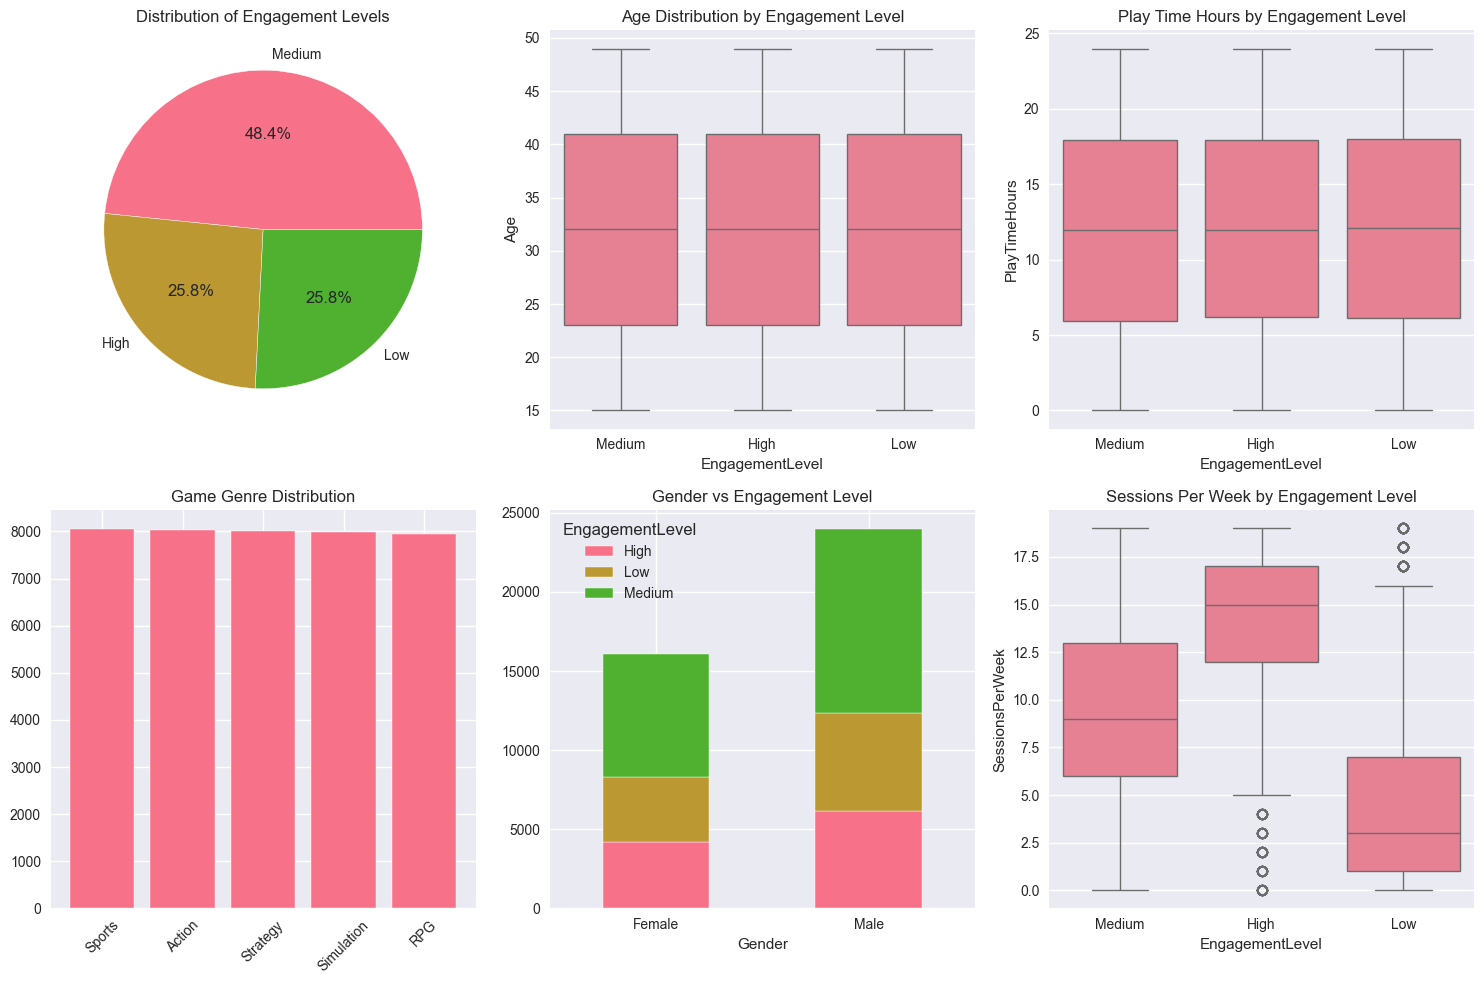

In [95]:
# ========== T·∫†O BI·ªÇU ƒê·ªí PH√ÇN T√çCH H√ÄNH VI GAMING ==========

# T·∫°o khung v·∫Ω (figure) v·ªõi k√≠ch th∆∞·ªõc 15x10 inch ƒë·ªÉ ch·ª©a 6 bi·ªÉu ƒë·ªì con
plt.figure(figsize=(15, 10))

# BI·ªÇU ƒê·ªí 1: Ph√¢n ph·ªëi m·ª©c ƒë·ªô g·∫Øn b√≥ (Target Variable)
plt.subplot(2, 3, 1)  # T·∫°o bi·ªÉu ƒë·ªì con ·ªü v·ªã tr√≠ (2 h√†ng, 3 c·ªôt, v·ªã tr√≠ 1)
engagement_counts = df['EngagementLevel'].value_counts()  # ƒê·∫øm s·ªë l∆∞·ª£ng t·ª´ng m·ª©c ƒë·ªô g·∫Øn b√≥
plt.pie(engagement_counts.values,  # D·ªØ li·ªáu cho bi·ªÉu ƒë·ªì tr√≤n (gi√° tr·ªã)
        labels=engagement_counts.index,  # Nh√£n cho t·ª´ng ph·∫ßn (High, Medium, Low)
        autopct='%1.1f%%')  # Hi·ªÉn th·ªã % v·ªõi 1 ch·ªØ s·ªë th·∫≠p ph√¢n
plt.title('Distribution of Engagement Levels')  # Ti√™u ƒë·ªÅ bi·ªÉu ƒë·ªì

# BI·ªÇU ƒê·ªí 2: Ph√¢n ph·ªëi tu·ªïi theo m·ª©c ƒë·ªô g·∫Øn b√≥
plt.subplot(2, 3, 2)  # V·ªã tr√≠ th·ª© 2 trong l∆∞·ªõi 2x3
sns.boxplot(data=df,  # D·ªØ li·ªáu ngu·ªìn
           x='EngagementLevel',  # Tr·ª•c x: m·ª©c ƒë·ªô g·∫Øn b√≥
           y='Age')  # Tr·ª•c y: tu·ªïi
plt.title('Age Distribution by Engagement Level')  # Ti√™u ƒë·ªÅ

# BI·ªÇU ƒê·ªí 3: Ph√¢n ph·ªëi th·ªùi gian ch∆°i theo m·ª©c ƒë·ªô g·∫Øn b√≥
plt.subplot(2, 3, 3)  # V·ªã tr√≠ th·ª© 3
sns.boxplot(data=df,  # D·ªØ li·ªáu ngu·ªìn
           x='EngagementLevel',  # Tr·ª•c x: m·ª©c ƒë·ªô g·∫Øn b√≥
           y='PlayTimeHours')  # Tr·ª•c y: gi·ªù ch∆°i
plt.title('Play Time Hours by Engagement Level')  # Ti√™u ƒë·ªÅ

# BI·ªÇU ƒê·ªí 4: Ph√¢n ph·ªëi th·ªÉ lo·∫°i game
plt.subplot(2, 3, 4)  # V·ªã tr√≠ th·ª© 4
genre_counts = df['GameGenre'].value_counts()  # ƒê·∫øm s·ªë l∆∞·ª£ng t·ª´ng th·ªÉ lo·∫°i game
plt.bar(genre_counts.index,  # Tr·ª•c x: t√™n th·ªÉ lo·∫°i game
        genre_counts.values)  # Tr·ª•c y: s·ªë l∆∞·ª£ng ng∆∞·ªùi ch∆°i
plt.title('Game Genre Distribution')  # Ti√™u ƒë·ªÅ
plt.xticks(rotation=45)  # Xoay nh√£n tr·ª•c x 45 ƒë·ªô ƒë·ªÉ d·ªÖ ƒë·ªçc

# BI·ªÇU ƒê·ªí 5: M·ªëi quan h·ªá gi·ªõi t√≠nh v√† m·ª©c ƒë·ªô g·∫Øn b√≥
plt.subplot(2, 3, 5)  # V·ªã tr√≠ th·ª© 5
gender_engagement = pd.crosstab(df['Gender'],  # H√†ng: gi·ªõi t√≠nh
                               df['EngagementLevel'])  # C·ªôt: m·ª©c ƒë·ªô g·∫Øn b√≥
gender_engagement.plot(kind='bar',  # Lo·∫°i bi·ªÉu ƒë·ªì: c·ªôt
                      stacked=True,  # X·∫øp ch·ªìng c√°c c·ªôt
                      ax=plt.gca())  # V·∫Ω tr√™n axes hi·ªán t·∫°i
plt.title('Gender vs Engagement Level')  # Ti√™u ƒë·ªÅ
plt.xticks(rotation=0)  # Kh√¥ng xoay nh√£n tr·ª•c x

# BI·ªÇU ƒê·ªí 6: S·ªë phi√™n ch∆°i m·ªói tu·∫ßn theo m·ª©c ƒë·ªô g·∫Øn b√≥
plt.subplot(2, 3, 6)  # V·ªã tr√≠ th·ª© 6 (cu·ªëi c√πng)
sns.boxplot(data=df,  # D·ªØ li·ªáu ngu·ªìn
           x='EngagementLevel',  # Tr·ª•c x: m·ª©c ƒë·ªô g·∫Øn b√≥
           y='SessionsPerWeek')  # Tr·ª•c y: s·ªë phi√™n ch∆°i/tu·∫ßn
plt.title('Sessions Per Week by Engagement Level')  # Ti√™u ƒë·ªÅ

# ƒêi·ªÅu ch·ªânh layout ƒë·ªÉ c√°c bi·ªÉu ƒë·ªì kh√¥ng b·ªã ch·ªìng l·∫•p
plt.tight_layout()
# Hi·ªÉn th·ªã t·∫•t c·∫£ bi·ªÉu ƒë·ªì
plt.show()


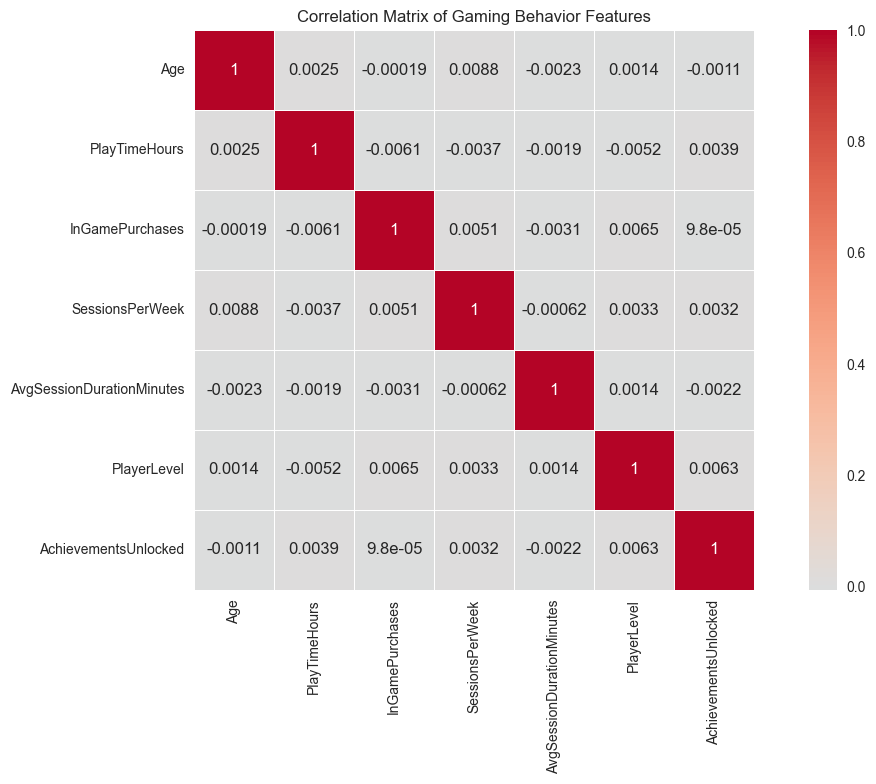

Strong correlations (|r| > 0.5):


In [96]:
# ========== PH√ÇN T√çCH T∆Ø∆†NG QUAN (CORRELATION ANALYSIS) ==========

# T·∫°o khung v·∫Ω v·ªõi k√≠ch th∆∞·ªõc 12x8 inch cho heatmap correlation
plt.figure(figsize=(12, 8))

# Ch·ªçn c√°c c·ªôt d·ªØ li·ªáu s·ªë ƒë·ªÉ t√≠nh correlation
# Ch·ªâ c√°c bi·∫øn s·ªë m·ªõi c√≥ th·ªÉ t√≠nh ƒë∆∞·ª£c correlation coefficient (h·ªá s·ªë t∆∞∆°ng quan)
numerical_cols = ['Age',                      # Tu·ªïi
                  'PlayTimeHours',            # S·ªë gi·ªù ch∆°i
                  'InGamePurchases',          # Mua h√†ng trong game (0 ho·∫∑c 1)
                  'SessionsPerWeek',          # S·ªë phi√™n ch∆°i m·ªói tu·∫ßn
                  'AvgSessionDurationMinutes', # Th·ªùi l∆∞·ª£ng trung b√¨nh m·ªói phi√™n (ph√∫t)
                  'PlayerLevel',              # Level c·ªßa ng∆∞·ªùi ch∆°i
                  'AchievementsUnlocked']     # S·ªë achievement ƒë√£ m·ªü kh√≥a

# T·∫°o ma tr·∫≠n t∆∞∆°ng quan (correlation matrix)
# .corr() t√≠nh h·ªá s·ªë t∆∞∆°ng quan Pearson gi·ªØa t·∫•t c·∫£ c√°c c·∫∑p bi·∫øn
# Gi√° tr·ªã t·ª´ -1 ƒë·∫øn 1: -1 (t∆∞∆°ng quan √¢m ho√†n to√†n), 0 (kh√¥ng t∆∞∆°ng quan), 1 (t∆∞∆°ng quan d∆∞∆°ng ho√†n to√†n)
correlation_matrix = df[numerical_cols].corr()

# V·∫Ω heatmap ƒë·ªÉ tr·ª±c quan h√≥a ma tr·∫≠n t∆∞∆°ng quan
sns.heatmap(correlation_matrix,           # D·ªØ li·ªáu ma tr·∫≠n t∆∞∆°ng quan
            annot=True,                   # Hi·ªÉn th·ªã gi√° tr·ªã s·ªë tr√™n t·ª´ng √¥
            cmap='coolwarm',              # B·∫£ng m√†u: xanh (√¢m) -> tr·∫Øng (0) -> ƒë·ªè (d∆∞∆°ng)
            center=0,                     # ƒê·∫∑t m√†u tr·∫Øng t·∫°i gi√° tr·ªã 0
            square=True,                  # C√°c √¥ vu√¥ng ƒë·ªÅu
            linewidths=0.5)               # ƒê·ªô d√†y ƒë∆∞·ªùng vi·ªÅn gi·ªØa c√°c √¥

# Th√™m ti√™u ƒë·ªÅ cho bi·ªÉu ƒë·ªì
plt.title('Correlation Matrix of Gaming Behavior Features')
# T·ªëi ∆∞u layout ƒë·ªÉ tr√°nh b·ªã c·∫Øt ch·ªØ
plt.tight_layout()
# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()

# ===== PH√ÇN T√çCH CHI TI·∫æT C√ÅC T∆Ø∆†NG QUAN M·∫†NH =====

# T√¨m v√† in ra c√°c c·∫∑p bi·∫øn c√≥ t∆∞∆°ng quan m·∫°nh (h·ªá s·ªë t∆∞∆°ng quan > 0.5 ho·∫∑c < -0.5)
print("Strong correlations (|r| > 0.5):")

# Duy·ªát qua t·∫•t c·∫£ c√°c c·∫∑p bi·∫øn trong ma tr·∫≠n t∆∞∆°ng quan (tr√°nh l·∫∑p l·∫°i)
for i in range(len(correlation_matrix.columns)):      # Duy·ªát h√†ng
    for j in range(i+1, len(correlation_matrix.columns)):  # Duy·ªát c·ªôt (ch·ªâ n·ª≠a tr√™n c·ªßa ma tr·∫≠n)
        # Ki·ªÉm tra n·∫øu gi√° tr·ªã tuy·ªát ƒë·ªëi c·ªßa correlation > 0.5
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            # In ra t√™n 2 bi·∫øn v√† h·ªá s·ªë t∆∞∆°ng quan (l√†m tr√≤n 3 ch·ªØ s·ªë th·∫≠p ph√¢n)
            print(f"{correlation_matrix.columns[i]} - {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.3f}")


In [97]:
# ========== TI·ªÄN X·ª¨ L√ù D·ªÆ LI·ªÜU CHO MACHINE LEARNING ==========

# T·∫°o b·∫£n sao c·ªßa dataset g·ªëc ƒë·ªÉ x·ª≠ l√Ω (tr√°nh l√†m thay ƒë·ªïi d·ªØ li·ªáu g·ªëc)
df_processed = df.copy()

# Lo·∫°i b·ªè c·ªôt PlayerID v√¨ ƒë√¢y ch·ªâ l√† ƒë·ªãnh danh, kh√¥ng c√≥ gi√° tr·ªã d·ª± ƒëo√°n
# axis=1 nghƒ©a l√† x√≥a theo c·ªôt (axis=0 s·∫Ω x√≥a theo h√†ng)
df_processed = df_processed.drop('PlayerID', axis=1)

# ===== M√É H√ìA C√ÅC BI·∫æN PH√ÇN LO·∫†I (CATEGORICAL ENCODING) =====

# T·∫°o dictionary ƒë·ªÉ l∆∞u tr·ªØ t·∫•t c·∫£ c√°c encoder (ƒë·ªÉ c√≥ th·ªÉ decode sau n√†y)
label_encoders = {}

# Danh s√°ch c√°c c·ªôt ch·ª©a d·ªØ li·ªáu ph√¢n lo·∫°i (text) c·∫ßn m√£ h√≥a th√†nh s·ªë
categorical_features = ['Gender',          # Gi·ªõi t√≠nh: Male, Female
                       'Location',         # V·ªã tr√≠: Asia, Europe, USA, Other
                       'GameGenre',        # Th·ªÉ lo·∫°i game: Action, RPG, Sports, etc.
                       'GameDifficulty']   # ƒê·ªô kh√≥: Easy, Medium, Hard

# Duy·ªát qua t·ª´ng bi·∫øn ph√¢n lo·∫°i ƒë·ªÉ m√£ h√≥a
for feature in categorical_features:
    # T·∫°o m·ªôt LabelEncoder ri√™ng cho t·ª´ng bi·∫øn
    le = LabelEncoder()
    
    # Fit encoder v√† transform d·ªØ li·ªáu: text ‚Üí s·ªë
    # T·∫°o c·ªôt m·ªõi v·ªõi t√™n g·ªëc + '_encoded'
    df_processed[feature + '_encoded'] = le.fit_transform(df_processed[feature])
    
    # L∆∞u encoder v√†o dictionary ƒë·ªÉ s·ª≠ d·ª•ng sau n√†y
    label_encoders[feature] = le
    
    # In ra mapping ƒë·ªÉ hi·ªÉu c√°ch m√£ h√≥a
    print(f"{feature} encoding mapping:")
    # enumerate() ƒë·ªÉ l·∫•y index v√† gi√° tr·ªã t·ª´ danh s√°ch classes_
    for i, label in enumerate(le.classes_):
        print(f"  {label}: {i}")  # VD: Male: 0, Female: 1
    print()  # D√≤ng tr·ªëng ƒë·ªÉ d·ªÖ ƒë·ªçc

# ===== M√É H√ìA BI·∫æN M·ª§C TI√äU (TARGET VARIABLE ENCODING) =====

# T·∫°o encoder ri√™ng cho bi·∫øn target (EngagementLevel)
target_encoder = LabelEncoder()

# M√£ h√≥a bi·∫øn target: High/Medium/Low ‚Üí 0/1/2
df_processed['EngagementLevel_encoded'] = target_encoder.fit_transform(df_processed['EngagementLevel'])

# In ra mapping c·ªßa target variable
print("Target variable encoding:")
for i, label in enumerate(target_encoder.classes_):
    print(f"  {label}: {i}")  # VD: High: 0, Low: 1, Medium: 2

# ===== CHU·∫®N B·ªä D·ªÆ LI·ªÜU CHO MODEL =====

# Ch·ªçn c√°c c·ªôt features ƒë·ªÉ ƒë∆∞a v√†o model
feature_columns = (['Age',                      # C√°c bi·∫øn s·ªë (numerical features)
                   'PlayTimeHours', 
                   'InGamePurchases', 
                   'SessionsPerWeek',
                   'AvgSessionDurationMinutes', 
                   'PlayerLevel', 
                   'AchievementsUnlocked'] + 
                  [f + '_encoded' for f in categorical_features])  # C√°c bi·∫øn ph√¢n lo·∫°i ƒë√£ m√£ h√≥a

# T·∫°o ma tr·∫≠n features (X) - d·ªØ li·ªáu ƒë·∫ßu v√†o cho model
X = df_processed[feature_columns]

# T·∫°o vector target (y) - bi·∫øn c·∫ßn d·ª± ƒëo√°n
y = df_processed['EngagementLevel_encoded']

# In th√¥ng tin v·ªÅ k√≠ch th∆∞·ªõc d·ªØ li·ªáu
print(f"\nFeature matrix shape: {X.shape}")    # (s·ªë m·∫´u, s·ªë features)
print(f"Target vector shape: {y.shape}")       # (s·ªë m·∫´u,)
print(f"\nFeatures used: {feature_columns}")   # Danh s√°ch t√™n c√°c features


Gender encoding mapping:
  Female: 0
  Male: 1

Location encoding mapping:
  Asia: 0
  Europe: 1
  Other: 2
  USA: 3

GameGenre encoding mapping:
  Action: 0
  RPG: 1
  Simulation: 2
  Sports: 3
  Strategy: 4

GameDifficulty encoding mapping:
  Easy: 0
  Hard: 1
  Medium: 2

Target variable encoding:
  High: 0
  Low: 1
  Medium: 2

Feature matrix shape: (40034, 11)
Target vector shape: (40034,)

Features used: ['Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked', 'Gender_encoded', 'Location_encoded', 'GameGenre_encoded', 'GameDifficulty_encoded']


In [98]:
# ========== CHIA T√ÅCH D·ªÆ LI·ªÜU TH√ÄNH T·∫¨P HU·∫§N LUY·ªÜN V√Ä KI·ªÇM TH·ª¨ ==========

# Chia d·ªØ li·ªáu th√†nh 2 ph·∫ßn: training set (80%) v√† testing set (20%)
# ƒê√¢y l√† b∆∞·ªõc quan tr·ªçng ƒë·ªÉ ƒë√°nh gi√° kh√°ch quan hi·ªáu su·∫•t model
X_train, X_test, y_train, y_test = train_test_split(
    X,                    # Ma tr·∫≠n features (input)
    y,                    # Vector target (output)
    test_size=0.2,        # 20% d·ªØ li·ªáu d√†nh cho test, 80% cho train
    random_state=42,      # Seed ƒë·ªÉ t√°i t·∫°o k·∫øt qu·∫£ (reproducibility)
    stratify=y            # ƒê·∫£m b·∫£o t·ª∑ l·ªá c√°c class trong train/test gi·ªëng nhau
)

# ===== KI·ªÇM TRA K√çCH TH∆Ø·ªöC C√ÅC T·∫¨P D·ªÆ LI·ªÜU =====

# In k√≠ch th∆∞·ªõc c·ªßa t·∫≠p training (ƒë·ªÉ hu·∫•n luy·ªán model)
print(f"Training set shape: {X_train.shape}")    # (s·ªë m·∫´u train, s·ªë features)

# In k√≠ch th∆∞·ªõc c·ªßa t·∫≠p testing (ƒë·ªÉ ƒë√°nh gi√° model)
print(f"Testing set shape: {X_test.shape}")      # (s·ªë m·∫´u test, s·ªë features)

# ===== KI·ªÇM TRA PH√ÇN PH·ªêI C√ÅC CLASS TRONG TRAINING SET =====

# In ph√¢n ph·ªëi c√°c m·ª©c engagement trong t·∫≠p training
print(f"Training target distribution:")
# Chuy·ªÉn y_train th√†nh Series ƒë·ªÉ d√πng value_counts(), sort_index() ƒë·ªÉ s·∫Øp x·∫øp theo class
print(pd.Series(y_train).value_counts().sort_index())

# ===== KI·ªÇM TRA PH√ÇN PH·ªêI C√ÅC CLASS TRONG TESTING SET =====

# In ph√¢n ph·ªëi c√°c m·ª©c engagement trong t·∫≠p testing
print(f"\nTesting target distribution:")
# Ki·ªÉm tra xem stratify c√≥ ho·∫°t ƒë·ªông ƒë√∫ng kh√¥ng (t·ª∑ l·ªá train/test ph·∫£i gi·ªëng nhau)
print(pd.Series(y_test).value_counts().sort_index())


Training set shape: (32027, 11)
Testing set shape: (8007, 11)
Training target distribution:
EngagementLevel_encoded
0     8269
1     8259
2    15499
Name: count, dtype: int64

Testing target distribution:
EngagementLevel_encoded
0    2067
1    2065
2    3875
Name: count, dtype: int64


In [99]:
# ========== X√ÇY D·ª∞NG V√Ä HU·∫§N LUY·ªÜN M√î H√åNH RANDOM FOREST ==========

# Kh·ªüi t·∫°o Random Forest Classifier v·ªõi c√°c hyperparameters
rf_classifier = RandomForestClassifier(
    n_estimators=100,      # S·ªë l∆∞·ª£ng c√¢y quy·∫øt ƒë·ªãnh trong r·ª´ng (100 c√¢y)
    random_state=42,       # Seed ƒë·ªÉ ƒë·∫£m b·∫£o k·∫øt qu·∫£ c√≥ th·ªÉ t√°i t·∫°o
    max_depth=None,        # ƒê·ªô s√¢u t·ªëi ƒëa c·ªßa c√¢y (None = kh√¥ng gi·ªõi h·∫°n)
    min_samples_split=2,   # S·ªë m·∫´u t·ªëi thi·ªÉu ƒë·ªÉ chia n√∫t (2 = m·∫∑c ƒë·ªãnh)
    min_samples_leaf=1,    # S·ªë m·∫´u t·ªëi thi·ªÉu t·∫°i m·ªói l√° (1 = m·∫∑c ƒë·ªãnh)
    n_jobs=-1              # S·ª≠ d·ª•ng t·∫•t c·∫£ CPU cores ƒë·ªÉ tƒÉng t·ªëc (-1 = t·∫•t c·∫£ cores)
)

# ===== HU·∫§N LUY·ªÜN M√î H√åNH =====

# Th√¥ng b√°o b·∫Øt ƒë·∫ßu qu√° tr√¨nh training
print("Training Random Forest Classifier...")

# Hu·∫•n luy·ªán model v·ªõi d·ªØ li·ªáu training
# fit() h·ªçc patterns t·ª´ X_train (features) v√† y_train (targets)
rf_classifier.fit(X_train, y_train)

# Th√¥ng b√°o ho√†n th√†nh training
print("Training completed!")

# ===== D·ª∞ ƒêO√ÅN V·ªöI D·ªÆ LI·ªÜU TEST =====

# D·ª± ƒëo√°n class cho t·∫≠p test (tr·∫£ v·ªÅ class c√≥ x√°c su·∫•t cao nh·∫•t)
# K·∫øt qu·∫£: array c√°c s·ªë 0, 1, 2 t∆∞∆°ng ·ª©ng High, Low, Medium
y_pred = rf_classifier.predict(X_test)

# D·ª± ƒëo√°n x√°c su·∫•t cho t·ª´ng class (tr·∫£ v·ªÅ ma tr·∫≠n x√°c su·∫•t)
# Shape: (n_samples, n_classes) - m·ªói h√†ng t·ªïng = 1.0
y_pred_proba = rf_classifier.predict_proba(X_test)

# ===== ƒê√ÅNH GI√Å HI·ªÜU SU·∫§T M√î H√åNH =====

# T√≠nh ƒë·ªô ch√≠nh x√°c (accuracy) = s·ªë d·ª± ƒëo√°n ƒë√∫ng / t·ªïng s·ªë d·ª± ƒëo√°n
accuracy = accuracy_score(y_test,     # Nh√£n th·ª±c t·∫ø
                         y_pred)      # Nh√£n d·ª± ƒëo√°n
print(f"\nModel Accuracy: {accuracy:.4f}")  # In v·ªõi 4 ch·ªØ s·ªë th·∫≠p ph√¢n

# ===== CROSS-VALIDATION ƒê·ªÇ ƒê√ÅNH GI√Å ROBUST =====

# Th·ª±c hi·ªán k-fold cross-validation (k=5) tr√™n t·∫≠p training
# Chia training th√†nh 5 fold, m·ªói l·∫ßn d√πng 4 fold train, 1 fold validate
cv_scores = cross_val_score(
    rf_classifier,        # Model ƒë√£ ƒë∆∞·ª£c kh·ªüi t·∫°o
    X_train,             # Features c·ªßa t·∫≠p training
    y_train,             # Targets c·ªßa t·∫≠p training  
    cv=5                 # 5-fold cross-validation
)

# In ƒëi·ªÉm s·ªë c·ªßa t·ª´ng fold
print(f"Cross-validation scores: {cv_scores}")

# T√≠nh ƒëi·ªÉm trung b√¨nh v√† ƒë·ªô l·ªách chu·∫©n
# std * 2 ‚âà 95% confidence interval
print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


Training Random Forest Classifier...
Training completed!

Model Accuracy: 0.9098
Cross-validation scores: [0.91617234 0.90399625 0.91288056 0.90913349 0.91147541]
Mean CV score: 0.9107 (+/- 0.0081)


Classification Report:
              precision    recall  f1-score   support

        High       0.92      0.87      0.89      2067
         Low       0.91      0.88      0.89      2065
      Medium       0.91      0.95      0.93      3875

    accuracy                           0.91      8007
   macro avg       0.91      0.90      0.90      8007
weighted avg       0.91      0.91      0.91      8007



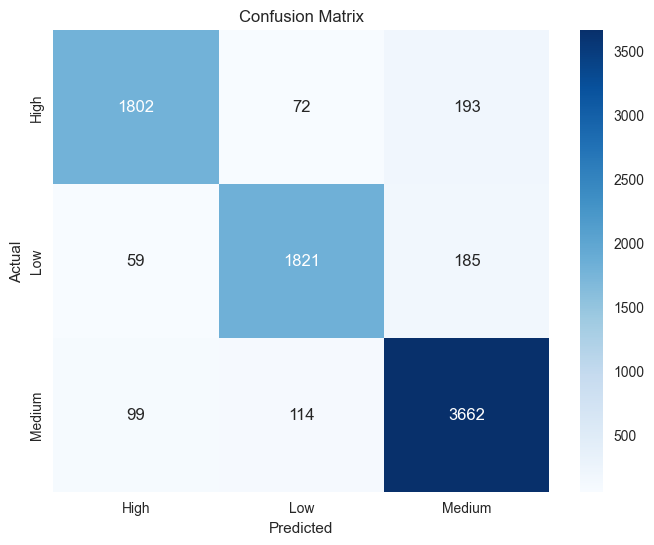

In [100]:
# ========== ƒê√ÅNH GI√Å CHI TI·∫æT HI·ªÜU SU·∫§T M√î H√åNH ==========

# ===== B√ÅOC√ÅO PH√ÇN LO·∫†I CHI TI·∫æT (CLASSIFICATION REPORT) =====

# In ti√™u ƒë·ªÅ cho ph·∫ßn b√°o c√°o ph√¢n lo·∫°i
print("Classification Report:")

# T·∫°o b√°o c√°o chi ti·∫øt bao g·ªìm precision, recall, f1-score cho t·ª´ng class
print(classification_report(
    y_test,                     # Nh√£n th·ª±c t·∫ø (ground truth)
    y_pred,                     # Nh√£n d·ª± ƒëo√°n t·ª´ model
    target_names=target_encoder.classes_  # T√™n c√°c class: ['High', 'Low', 'Medium']
))

# ===== MA TR·∫¨N NH·∫¶M L·∫™N (CONFUSION MATRIX) =====

# T·∫°o khung v·∫Ω cho confusion matrix v·ªõi k√≠ch th∆∞·ªõc 8x6 inch
plt.figure(figsize=(8, 6))

# T√≠nh ma tr·∫≠n nh·∫ßm l·∫´n: so s√°nh d·ª± ƒëo√°n vs th·ª±c t·∫ø
# M·ªói √¥ [i,j] = s·ªë l∆∞·ª£ng m·∫´u th·ª±c t·∫ø class i ƒë∆∞·ª£c d·ª± ƒëo√°n th√†nh class j
cm = confusion_matrix(y_test,      # Nh√£n th·ª±c t·∫ø
                     y_pred)       # Nh√£n d·ª± ƒëo√°n

# V·∫Ω heatmap cho confusion matrix
sns.heatmap(
    cm,                                    # D·ªØ li·ªáu ma tr·∫≠n nh·∫ßm l·∫´n
    annot=True,                           # Hi·ªÉn th·ªã s·ªë li·ªáu tr√™n t·ª´ng √¥
    fmt='d',                              # Format s·ªë nguy√™n (kh√¥ng c√≥ s·ªë th·∫≠p ph√¢n)
    cmap='Blues',                         # B·∫£ng m√†u xanh d∆∞∆°ng (nh·∫°t ‚Üí ƒë·∫≠m)
    xticklabels=target_encoder.classes_,  # Nh√£n tr·ª•c x: ['High', 'Low', 'Medium']
    yticklabels=target_encoder.classes_   # Nh√£n tr·ª•c y: ['High', 'Low', 'Medium']
)

# Th√™m ti√™u ƒë·ªÅ cho bi·ªÉu ƒë·ªì
plt.title('Confusion Matrix')

# Th√™m nh√£n cho tr·ª•c x (d·ª± ƒëo√°n)
plt.xlabel('Predicted')

# Th√™m nh√£n cho tr·ª•c y (th·ª±c t·∫ø) 
plt.ylabel('Actual')

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()


Feature Importance Ranking:
                      feature  importance
3             SessionsPerWeek    0.419871
4   AvgSessionDurationMinutes    0.310380
1               PlayTimeHours    0.057187
5                 PlayerLevel    0.056206
6        AchievementsUnlocked    0.051251
0                         Age    0.041923
9           GameGenre_encoded    0.020020
8            Location_encoded    0.015778
10     GameDifficulty_encoded    0.012719
7              Gender_encoded    0.008067
2             InGamePurchases    0.006598


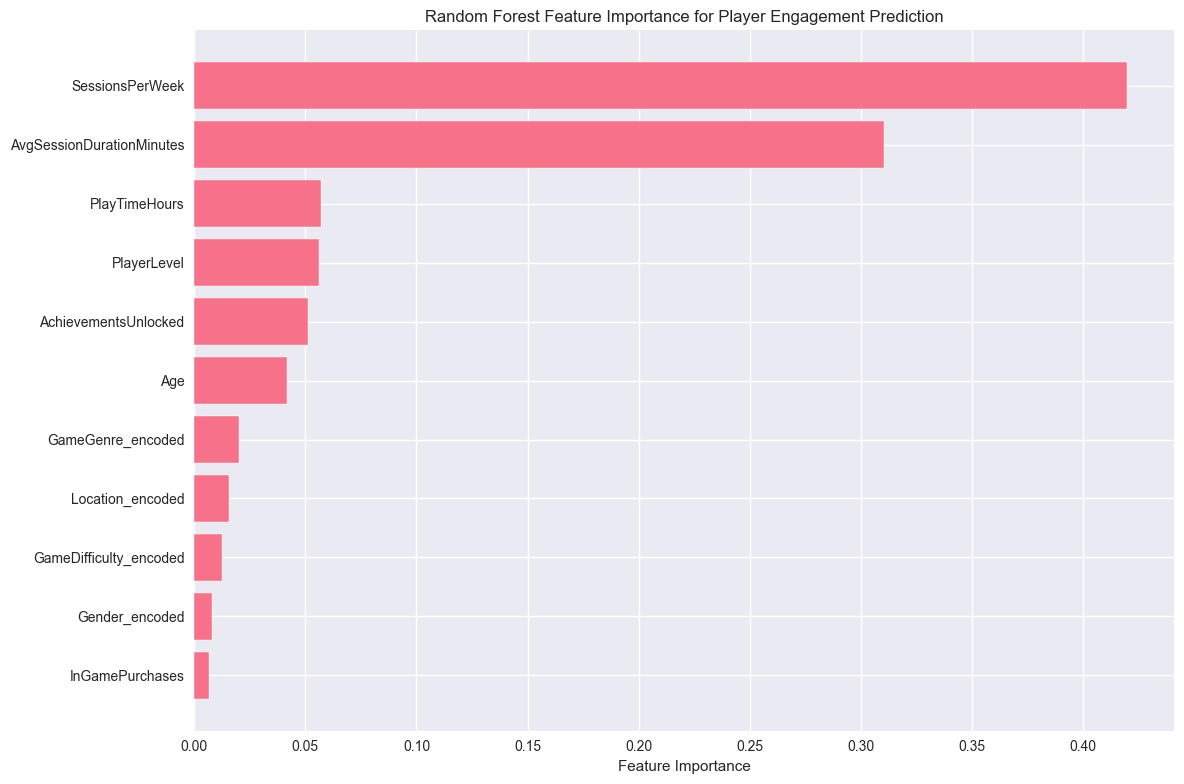


Top 5 Most Important Features:
1. SessionsPerWeek: 0.4199
2. AvgSessionDurationMinutes: 0.3104
3. PlayTimeHours: 0.0572
4. PlayerLevel: 0.0562
5. AchievementsUnlocked: 0.0513


In [101]:
# ========== PH√ÇN T√çCH ƒê·ªò QUAN TR·ªåNG C·ª¶A C√ÅC FEATURES ==========

# ===== T·∫†O B·∫¢NG X·∫æP H·∫†NG FEATURE IMPORTANCE =====

# T·∫°o DataFrame ch·ª©a t√™n feature v√† ƒë·ªô quan tr·ªçng t∆∞∆°ng ·ª©ng
feature_importance = pd.DataFrame({
    'feature': X.columns,                           # T√™n c√°c c·ªôt features (11 features)
    'importance': rf_classifier.feature_importances_ # ƒê·ªô quan tr·ªçng t·ª´ Random Forest
}).sort_values('importance', ascending=False)        # S·∫Øp x·∫øp gi·∫£m d·∫ßn theo ƒë·ªô quan tr·ªçng

# In ti√™u ƒë·ªÅ cho b·∫£ng x·∫øp h·∫°ng
print("Feature Importance Ranking:")
# In to√†n b·ªô b·∫£ng feature importance ƒë√£ ƒë∆∞·ª£c s·∫Øp x·∫øp
print(feature_importance)

# ===== V·∫º BI·ªÇU ƒê·ªí C·ªòT NGANG CHO FEATURE IMPORTANCE =====

# T·∫°o khung v·∫Ω v·ªõi k√≠ch th∆∞·ªõc 12x8 inch (ph√π h·ª£p cho bi·ªÉu ƒë·ªì ngang)
plt.figure(figsize=(12, 8))

# V·∫Ω bi·ªÉu ƒë·ªì c·ªôt ngang (horizontal bar chart)
plt.barh(range(len(feature_importance)),           # V·ªã tr√≠ y c·ªßa c√°c c·ªôt (0,1,2,...)
         feature_importance['importance'])          # ƒê·ªô d√†i c·ªôt = importance value

# ƒê·∫∑t nh√£n cho tr·ª•c y (t√™n c√°c features)
plt.yticks(range(len(feature_importance)),         # V·ªã tr√≠ c·ªßa c√°c tick
          feature_importance['feature'])           # T√™n feature t∆∞∆°ng ·ª©ng

# ƒê·∫∑t nh√£n cho tr·ª•c x (ƒë·ªô quan tr·ªçng)
plt.xlabel('Feature Importance')

# ƒê·∫∑t ti√™u ƒë·ªÅ cho bi·ªÉu ƒë·ªì
plt.title('Random Forest Feature Importance for Player Engagement Prediction')

# ƒê·∫£o ng∆∞·ª£c tr·ª•c y ƒë·ªÉ feature quan tr·ªçng nh·∫•t ·ªü tr√™n c√πng
plt.gca().invert_yaxis()

# T·ªëi ∆∞u layout ƒë·ªÉ tr√°nh b·ªã c·∫Øt text
plt.tight_layout()

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()

# ===== IN TOP 5 FEATURES QUAN TR·ªåNG NH·∫§T =====

# In ti√™u ƒë·ªÅ cho top 5
print(f"\nTop 5 Most Important Features:")

# Duy·ªát qua 5 features ƒë·∫ßu ti√™n (quan tr·ªçng nh·∫•t)
for i, (feature, importance) in enumerate(feature_importance.head().values, 1):
    # enumerate() b·∫Øt ƒë·∫ßu t·ª´ 1 ƒë·ªÉ ƒë√°nh s·ªë th·ª© t·ª±
    # .head() l·∫•y 5 h√†ng ƒë·∫ßu, .values l·∫•y array numpy
    # feature = t√™n feature, importance = gi√° tr·ªã ƒë·ªô quan tr·ªçng
    print(f"{i}. {feature}: {importance:.4f}")     # In v·ªõi 4 ch·ªØ s·ªë th·∫≠p ph√¢n


In [102]:
# ========== T·ªêI ∆ØU H√ìA HYPERPARAMETERS V·ªöI GRID SEARCH ==========

# ===== ƒê·ªäNH NGHƒ®A L∆Ø·ªöI C√ÅC THAM S·ªê C·∫¶N T·ªêI ∆ØU =====

# T·∫°o dictionary ch·ª©a c√°c gi√° tr·ªã hyperparameters c·∫ßn th·ª≠ nghi·ªám
param_grid = {
    'n_estimators': [50, 100, 200],        # S·ªë c√¢y trong r·ª´ng: √≠t ‚Üí nhi·ªÅu
    'max_depth': [None, 10, 20, 30],       # ƒê·ªô s√¢u t·ªëi ƒëa: kh√¥ng gi·ªõi h·∫°n ‚Üí gi·ªõi h·∫°n
    'min_samples_split': [2, 5, 10],       # S·ªë m·∫´u t·ªëi thi·ªÉu ƒë·ªÉ chia n√∫t: √≠t ‚Üí nhi·ªÅu  
    'min_samples_leaf': [1, 2, 4]          # S·ªë m·∫´u t·ªëi thi·ªÉu t·∫°i l√°: √≠t ‚Üí nhi·ªÅu
}
# T·ªïng s·ªë combinations = 3√ó4√ó3√ó3 = 108 models c·∫ßn train

# ===== TH·ª∞C HI·ªÜN GRID SEARCH V·ªöI CROSS-VALIDATION =====

# Th√¥ng b√°o b·∫Øt ƒë·∫ßu qu√° tr√¨nh t·ªëi ∆∞u h√≥a
print("Performing hyperparameter tuning...")

# Kh·ªüi t·∫°o GridSearchCV ƒë·ªÉ t√¨m combination t·ªëi ∆∞u
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),  # Base model ƒë·ªÉ tune
    param_grid,                                          # Dictionary c√°c tham s·ªë c·∫ßn th·ª≠
    cv=3,                                               # 3-fold cross-validation (thay v√¨ 5 ƒë·ªÉ nhanh h∆°n)
    scoring='accuracy',                                 # Metric ƒë·ªÉ ƒë√°nh gi√° (accuracy)
    n_jobs=-1,                                         # S·ª≠ d·ª•ng t·∫•t c·∫£ CPU cores ƒë·ªÉ parallel
    verbose=1                                          # In progress trong qu√° tr√¨nh training
)

# Fit GridSearch tr√™n t·∫≠p training ƒë·ªÉ t√¨m best parameters
# Qu√° tr√¨nh: th·ª≠ 108 combinations √ó 3 folds = 324 models total
grid_search.fit(X_train, y_train)

# ===== IN K·∫æT QU·∫¢ T·ªêI ∆ØU H√ìA =====

# In ra combination tham s·ªë t·ªët nh·∫•t ƒë∆∞·ª£c t√¨m th·∫•y
print(f"Best parameters: {grid_search.best_params_}")

# In ƒëi·ªÉm cross-validation cao nh·∫•t ƒë·∫°t ƒë∆∞·ª£c
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# ===== HU·∫§N LUY·ªÜN MODEL CU·ªêI C√ôNG V·ªöI BEST PARAMETERS =====

# L·∫•y model ƒë√£ ƒë∆∞·ª£c train v·ªõi best parameters
best_rf = grid_search.best_estimator_

# D·ª± ƒëo√°n tr√™n t·∫≠p test v·ªõi model t·ªëi ∆∞u
y_pred_best = best_rf.predict(X_test)

# T√≠nh accuracy c·ªßa model ƒë√£ ƒë∆∞·ª£c t·ªëi ∆∞u h√≥a
accuracy_best = accuracy_score(y_test,          # Nh√£n th·ª±c t·∫ø  
                              y_pred_best)      # D·ª± ƒëo√°n t·ª´ best model

# ===== SO S√ÅNH K·∫æT QU·∫¢ =====

# In accuracy c·ªßa model ƒë√£ ƒë∆∞·ª£c c·∫£i thi·ªán
print(f"Improved model accuracy: {accuracy_best:.4f}")

# T√≠nh v√† in ƒë·ªô c·∫£i thi·ªán so v·ªõi model ban ƒë·∫ßu
# accuracy l√† bi·∫øn t·ª´ cell tr∆∞·ªõc (model ch∆∞a tune)
print(f"Improvement: {accuracy_best - accuracy:.4f}")


Performing hyperparameter tuning...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score: 0.9109
Improved model accuracy: 0.9092
Improvement: -0.0006


In [103]:
# ========== PH√ÇN T√çCH N√ÇNG CAO CHO GAMING INSIGHTS ==========

# ===== 1. PH√ÇN T√çCH PH√ÇN KH√öC NG∆Ø·ªúI CH∆†I (PLAYER SEGMENTATION) =====

# In ti√™u ƒë·ªÅ cho ph·∫ßn ph√¢n t√≠ch ph√¢n kh√∫c
print("=== PLAYER SEGMENTATION ANALYSIS ===")

# T·∫°o b·∫£ng ph√¢n t√≠ch ƒëa chi·ªÅu theo EngagementLevel v√† GameGenre
segmentation = df.groupby(['EngagementLevel', 'GameGenre']).agg({
    'Age': 'mean',              # Tu·ªïi trung b√¨nh c·ªßa t·ª´ng nh√≥m
    'PlayTimeHours': 'mean',    # Th·ªùi gian ch∆°i trung b√¨nh
    'SessionsPerWeek': 'mean',  # S·ªë phi√™n ch∆°i/tu·∫ßn trung b√¨nh
    'PlayerLevel': 'mean',      # Level trung b√¨nh c·ªßa ng∆∞·ªùi ch∆°i
    'InGamePurchases': 'sum'    # T·ªïng s·ªë l·∫ßn mua h√†ng trong game
}).round(2)                     # L√†m tr√≤n 2 ch·ªØ s·ªë th·∫≠p ph√¢n ƒë·ªÉ d·ªÖ ƒë·ªçc

# In ti√™u ƒë·ªÅ cho b·∫£ng k·∫øt qu·∫£
print("Player characteristics by engagement level and game genre:")
# Hi·ªÉn th·ªã b·∫£ng ph√¢n kh√∫c v·ªõi multi-index (EngagementLevel √ó GameGenre)
print(segmentation)

# ===== 2. PH√ÇN T√çCH PATTERN G·∫ÆN B√ì CHI TI·∫æT (ENGAGEMENT PATTERN) =====

# In ti√™u ƒë·ªÅ cho ph·∫ßn ph√¢n t√≠ch pattern
print("\n=== ENGAGEMENT PATTERN ANALYSIS ===")

# T√°ch dataset th√†nh 3 nh√≥m theo m·ª©c ƒë·ªô g·∫Øn b√≥
high_engagement = df[df['EngagementLevel'] == 'High']       # L·ªçc ng∆∞·ªùi ch∆°i High engagement
medium_engagement = df[df['EngagementLevel'] == 'Medium']   # L·ªçc ng∆∞·ªùi ch∆°i Medium engagement  
low_engagement = df[df['EngagementLevel'] == 'Low']         # L·ªçc ng∆∞·ªùi ch∆°i Low engagement

# ===== PH√ÇN T√çCH NH√ìM HIGH ENGAGEMENT =====

# In th√¥ng tin t·ªïng quan v·ªõi s·ªë l∆∞·ª£ng ng∆∞·ªùi ch∆°i trong nh√≥m
print(f"High Engagement Players ({len(high_engagement)} players):")

# T√≠nh v√† in th·ªùi gian ch∆°i trung b√¨nh (l√†m tr√≤n 2 ch·ªØ s·ªë)
print(f"  - Average Play Time: {high_engagement['PlayTimeHours'].mean():.2f} hours")

# T√≠nh v√† in s·ªë phi√™n ch∆°i trung b√¨nh m·ªói tu·∫ßn
print(f"  - Average Sessions/Week: {high_engagement['SessionsPerWeek'].mean():.2f}")

# T√≠nh v√† in level trung b√¨nh c·ªßa nh√≥m
print(f"  - Average Player Level: {high_engagement['PlayerLevel'].mean():.2f}")

# T√≠nh t·ª∑ l·ªá mua h√†ng trong game: (t·ªïng purchases / s·ªë ng∆∞·ªùi) √ó 100%
print(f"  - In-Game Purchase Rate: {(high_engagement['InGamePurchases'].sum() / len(high_engagement) * 100):.1f}%")

# ===== PH√ÇN T√çCH NH√ìM MEDIUM ENGAGEMENT =====

# T∆∞∆°ng t·ª± nh∆∞ tr√™n cho nh√≥m Medium engagement
print(f"\nMedium Engagement Players ({len(medium_engagement)} players):")
print(f"  - Average Play Time: {medium_engagement['PlayTimeHours'].mean():.2f} hours")
print(f"  - Average Sessions/Week: {medium_engagement['SessionsPerWeek'].mean():.2f}")
print(f"  - Average Player Level: {medium_engagement['PlayerLevel'].mean():.2f}")
print(f"  - In-Game Purchase Rate: {(medium_engagement['InGamePurchases'].sum() / len(medium_engagement) * 100):.1f}%")

# ===== PH√ÇN T√çCH NH√ìM LOW ENGAGEMENT =====

# T∆∞∆°ng t·ª± nh∆∞ tr√™n cho nh√≥m Low engagement
print(f"\nLow Engagement Players ({len(low_engagement)} players):")
print(f"  - Average Play Time: {low_engagement['PlayTimeHours'].mean():.2f} hours")
print(f"  - Average Sessions/Week: {low_engagement['SessionsPerWeek'].mean():.2f}")
print(f"  - Average Player Level: {low_engagement['PlayerLevel'].mean():.2f}")
print(f"  - In-Game Purchase Rate: {(low_engagement['InGamePurchases'].sum() / len(low_engagement) * 100):.1f}%")


=== PLAYER SEGMENTATION ANALYSIS ===
Player characteristics by engagement level and game genre:
                              Age  PlayTimeHours  SessionsPerWeek  \
EngagementLevel GameGenre                                           
High            Action      32.22          12.17            14.16   
                RPG         31.76          11.75            14.30   
                Simulation  31.81          11.84            14.20   
                Sports      32.15          12.26            14.29   
                Strategy    31.67          12.31            14.32   
Low             Action      31.69          12.35             4.55   
                RPG         31.73          12.17             4.45   
                Simulation  32.08          12.05             4.49   
                Sports      31.95          12.11             4.62   
                Strategy    32.04          11.83             4.54   
Medium          Action      31.95          12.06             9.59   
       

In [104]:
# ========== KHUY·∫æN NGH·ªä KINH DOANH D·ª∞A TR√äN K·∫æT QU·∫¢ M√î H√åNH ==========

# ===== 3. KHUY·∫æN NGH·ªä CHI·∫æN L∆Ø·ª¢C KINH DOANH =====

# In ti√™u ƒë·ªÅ ch√≠nh cho ph·∫ßn khuy·∫øn ngh·ªã
print("\n=== BUSINESS RECOMMENDATIONS ===")

# ===== PH√ÇN T√çCH C√ÅC Y·∫æU T·ªê QUAN TR·ªåNG NH·∫§T =====

# L·∫•y top 3 features quan tr·ªçng nh·∫•t t·ª´ feature importance analysis
top_features = feature_importance.head(3)['feature'].tolist()

# In th√¥ng ƒëi·ªáp d·ª±a tr√™n k·∫øt qu·∫£ ph√¢n t√≠ch Random Forest
print("Based on our Random Forest analysis, the top factors affecting player engagement are:")

# Duy·ªát qua t·ª´ng feature v√† in v·ªõi s·ªë th·ª© t·ª±
for i, feature in enumerate(top_features, 1):
    # enumerate(list, 1) ƒë·ªÉ b·∫Øt ƒë·∫ßu ƒë√°nh s·ªë t·ª´ 1 thay v√¨ 0
    print(f"{i}. {feature}")

# ===== C√ÅC KHUY·∫æN NGH·ªä CHI·∫æN L∆Ø·ª¢C CHI TI·∫æT =====

# In ti√™u ƒë·ªÅ ph·ª• cho ph·∫ßn khuy·∫øn ngh·ªã chi·∫øn l∆∞·ª£c
print("\n--- STRATEGIC RECOMMENDATIONS ---")

# ===== 1. CHI·∫æN L∆Ø·ª¢C GI·ªÆ CH√ÇN NG∆Ø·ªúI CH∆†I =====

print("\n1. PLAYER RETENTION STRATEGIES:")
# D·ª±a tr√™n insight t·ª´ SessionsPerWeek (feature quan tr·ªçng nh·∫•t)
print("   ‚Ä¢ Focus on increasing sessions per week for medium/low engagement players")
# D·ª±a tr√™n PlayerLevel v√† AchievementsUnlocked analysis
print("   ‚Ä¢ Develop achievement systems to boost player progression")
# D·ª±a tr√™n PlayTimeHours patterns
print("   ‚Ä¢ Create personalized content based on play time patterns")

# ===== 2. T·ªêI ∆ØU H√ìA THI·∫æT K·∫æ GAME =====

print("\n2. GAME DESIGN OPTIMIZATION:")
# D·ª±a tr√™n GameDifficulty analysis
print("   ‚Ä¢ Balance game difficulty to maintain engagement across all skill levels")
# D·ª±a tr√™n GameGenre segmentation analysis
print("   ‚Ä¢ Design genre-specific engagement mechanics")
# D·ª±a tr√™n AvgSessionDurationMinutes (feature quan tr·ªçng th·ª© 2)
print("   ‚Ä¢ Implement adaptive session duration recommendations")

# ===== 3. CHI·∫æN L∆Ø·ª¢C KI·∫æM TI·ªÄN =====

print("\n3. MONETIZATION STRATEGIES:")
# Target high-value segments d·ª±a tr√™n engagement analysis
print("   ‚Ä¢ Target high-engagement players with premium content")
# Focus conversion cho medium engagement (potential highest)
print("   ‚Ä¢ Create value propositions for medium-engagement players")
# Re-engage low engagement segments ƒë·ªÉ tr√°nh churn
print("   ‚Ä¢ Design re-engagement campaigns for low-engagement segments")

# ===== 4. CHI·∫æN L∆Ø·ª¢C MARKETING =====

print("\n4. MARKETING STRATEGIES:")
# D·ª±a tr√™n segmentation analysis (EngagementLevel √ó GameGenre)
print("   ‚Ä¢ Segment campaigns by engagement level and game genre")
# Target demographics v·ªõi high engagement patterns
print("   ‚Ä¢ Focus acquisition on demographics showing high engagement patterns")
# Identify v√† target at-risk segments
print("   ‚Ä¢ Develop retention campaigns for at-risk player segments")

# ===== PH√ÇN T√çCH R·ª¶I RO CHURN NG∆Ø·ªúI CH∆†I =====

# In ti√™u ƒë·ªÅ cho ph·∫ßn ph√¢n t√≠ch r·ªßi ro
print("\n--- PLAYER CHURN RISK ANALYSIS ---")

# ƒê·ªãnh nghƒ©a criteria cho high churn risk d·ª±a tr√™n 2 metrics quan tr·ªçng
# SessionsPerWeek < 3: Ch∆°i √≠t h∆°n 3 phi√™n/tu·∫ßn = low engagement
# PlayTimeHours < 10: T·ªïng th·ªùi gian ch∆°i th·∫•p = √≠t committed
risk_indicators = df[(df['SessionsPerWeek'] < 3) & (df['PlayTimeHours'] < 10)]

# T√≠nh v√† in s·ªë l∆∞·ª£ng + t·ª∑ l·ªá players at high churn risk
print(f"Players at high churn risk: {len(risk_indicators)} ({len(risk_indicators)/len(df)*100:.1f}% of total)")

# In ti√™u ƒë·ªÅ cho ph·∫ßn characteristics analysis
print("Characteristics of at-risk players:")

# Ph√¢n t√≠ch ƒë·∫∑c ƒëi·ªÉm c·ªßa at-risk players theo GameGenre v√† EngagementLevel
# .groupby().value_counts() ƒë·ªÉ xem distribution
print(risk_indicators.groupby('GameGenre')['EngagementLevel'].value_counts())



=== BUSINESS RECOMMENDATIONS ===
Based on our Random Forest analysis, the top factors affecting player engagement are:
1. SessionsPerWeek
2. AvgSessionDurationMinutes
3. PlayTimeHours

--- STRATEGIC RECOMMENDATIONS ---

1. PLAYER RETENTION STRATEGIES:
   ‚Ä¢ Focus on increasing sessions per week for medium/low engagement players
   ‚Ä¢ Develop achievement systems to boost player progression
   ‚Ä¢ Create personalized content based on play time patterns

2. GAME DESIGN OPTIMIZATION:
   ‚Ä¢ Balance game difficulty to maintain engagement across all skill levels
   ‚Ä¢ Design genre-specific engagement mechanics
   ‚Ä¢ Implement adaptive session duration recommendations

3. MONETIZATION STRATEGIES:
   ‚Ä¢ Target high-engagement players with premium content
   ‚Ä¢ Create value propositions for medium-engagement players
   ‚Ä¢ Design re-engagement campaigns for low-engagement segments

4. MARKETING STRATEGIES:
   ‚Ä¢ Segment campaigns by engagement level and game genre
   ‚Ä¢ Focus acquisiti

In [105]:
# ========== H√ÄM D·ª∞ ƒêO√ÅN ENGAGEMENT CHO DEPLOYMENT ==========

# ===== ƒê·ªäNH NGHƒ®A FUNCTION D·ª∞ ƒêO√ÅN ENGAGEMENT =====

def predict_player_engagement(age,                    # Tu·ªïi ng∆∞·ªùi ch∆°i (s·ªë)
                               play_time_hours,        # T·ªïng gi·ªù ch∆°i (s·ªë)
                               in_game_purchases,      # S·ªë l·∫ßn mua h√†ng (0 ho·∫∑c 1)
                               sessions_per_week,      # S·ªë phi√™n ch∆°i/tu·∫ßn (s·ªë)
                               avg_session_duration,   # Th·ªùi l∆∞·ª£ng trung b√¨nh/phi√™n (ph√∫t)
                               player_level,           # Level hi·ªán t·∫°i (s·ªë)
                               achievements_unlocked,  # S·ªë achievement ƒë√£ m·ªü (s·ªë)
                               gender,                 # Gi·ªõi t√≠nh ('Male'/'Female')
                               location,              # V·ªã tr√≠ ('Asia'/'Europe'/'USA'/'Other')
                               game_genre,            # Th·ªÉ lo·∫°i game ('Action'/'RPG'/...)
                               game_difficulty):      # ƒê·ªô kh√≥ ('Easy'/'Medium'/'Hard')
    """
    H√†m d·ª± ƒëo√°n m·ª©c ƒë·ªô g·∫Øn b√≥ c·ªßa ng∆∞·ªùi ch∆°i d·ª±a tr√™n ƒë·∫∑c ƒëi·ªÉm h√†nh vi gaming.
    
    Parameters (11 tham s·ªë ƒë·∫ßu v√†o):
    - age: Tu·ªïi ng∆∞·ªùi ch∆°i
    - play_time_hours: T·ªïng th·ªùi gian ch∆°i (gi·ªù)
    - in_game_purchases: S·ªë l·∫ßn mua h√†ng trong game (0 ho·∫∑c 1)
    - sessions_per_week: S·ªë phi√™n ch∆°i trung b√¨nh m·ªói tu·∫ßn
    - avg_session_duration: Th·ªùi l∆∞·ª£ng trung b√¨nh m·ªói phi√™n (ph√∫t)
    - player_level: Level hi·ªán t·∫°i c·ªßa ng∆∞·ªùi ch∆°i
    - achievements_unlocked: S·ªë achievement ƒë√£ m·ªü kh√≥a
    - gender: Gi·ªõi t√≠nh ('Male' ho·∫∑c 'Female')
    - location: V·ªã tr√≠ ƒë·ªãa l√Ω ('Asia', 'Europe', 'USA', ho·∫∑c 'Other')
    - game_genre: Th·ªÉ lo·∫°i game ('Action', 'RPG', 'Simulation', 'Sports', 'Strategy')
    - game_difficulty: ƒê·ªô kh√≥ game ('Easy', 'Medium', 'Hard')
    
    Returns (k·∫øt qu·∫£ tr·∫£ v·ªÅ):
    - Dictionary ch·ª©a predicted engagement level v√† probabilities
    """
    
    # ===== M√É H√ìA C√ÅC BI·∫æN PH√ÇN LO·∫†I =====
    
    # S·ª≠ d·ª•ng encoders ƒë√£ ƒë∆∞·ª£c train ƒë·ªÉ chuy·ªÉn text th√†nh s·ªë
    # [gender] t·∫°o list v·ªõi 1 ph·∫ßn t·ª≠, [0] l·∫•y ph·∫ßn t·ª≠ ƒë·∫ßu ti√™n
    gender_encoded = label_encoders['Gender'].transform([gender])[0]
    
    # Transform location th√†nh s·ªë t∆∞∆°ng ·ª©ng (Asia=0, Europe=1, etc.)
    location_encoded = label_encoders['Location'].transform([location])[0]
    
    # Transform game genre th√†nh s·ªë (Action=0, RPG=1, etc.)
    genre_encoded = label_encoders['GameGenre'].transform([game_genre])[0]
    
    # Transform difficulty th√†nh s·ªë (Easy=0, Hard=1, Medium=2)
    difficulty_encoded = label_encoders['GameDifficulty'].transform([game_difficulty])[0]
    
    # ===== T·∫†O VECTOR ƒê·∫∂C TR∆ØNG CHO MODEL =====
    
    # T·∫°o array 2D v·ªõi shape (1, 11) - 1 sample, 11 features
    # Th·ª© t·ª± features ph·∫£i gi·ªëng v·ªõi training data
    features = np.array([[age,                     # Feature 0: Age
                         play_time_hours,          # Feature 1: PlayTimeHours
                         in_game_purchases,        # Feature 2: InGamePurchases
                         sessions_per_week,        # Feature 3: SessionsPerWeek
                         avg_session_duration,     # Feature 4: AvgSessionDurationMinutes
                         player_level,             # Feature 5: PlayerLevel
                         achievements_unlocked,    # Feature 6: AchievementsUnlocked
                         gender_encoded,           # Feature 7: Gender_encoded
                         location_encoded,         # Feature 8: Location_encoded
                         genre_encoded,            # Feature 9: GameGenre_encoded
                         difficulty_encoded]])     # Feature 10: GameDifficulty_encoded
    
    # ===== TH·ª∞C HI·ªÜN D·ª∞ ƒêO√ÅN V·ªöI BEST MODEL =====
    
    # D·ª± ƒëo√°n class (tr·∫£ v·ªÅ s·ªë: 0, 1, ho·∫∑c 2)
    # [0] ƒë·ªÉ l·∫•y k·∫øt qu·∫£ c·ªßa sample ƒë·∫ßu ti√™n (v√¨ ch·ªâ c√≥ 1 sample)
    prediction = best_rf.predict(features)[0]
    
    # D·ª± ƒëo√°n x√°c su·∫•t cho t·ª´ng class (array v·ªõi 3 gi√° tr·ªã)
    # predict_proba() tr·∫£ v·ªÅ [[prob_class0, prob_class1, prob_class2]]
    probability = best_rf.predict_proba(features)[0]
    
    # ===== CHUY·ªÇN ƒê·ªîI K·∫æT QU·∫¢ V·ªÄ D·∫†NG D·ªÑ HI·ªÇU =====
    
    # Chuy·ªÉn t·ª´ s·ªë (0,1,2) v·ªÅ text ('High', 'Low', 'Medium')
    # inverse_transform() th·ª±c hi·ªán ph√©p ngh·ªãch ƒë·∫£o c·ªßa transform()
    engagement_level = target_encoder.inverse_transform([prediction])[0]
    
    # ===== TR·∫¢ V·ªÄ K·∫æT QU·∫¢ D∆Ø D·∫†NG DICTIONARY =====
    
    return {
        'predicted_engagement': engagement_level,      # Class ƒë∆∞·ª£c d·ª± ƒëo√°n
        'probabilities': {                            # X√°c su·∫•t cho t·ª´ng class
            'High': probability[0],                   # X√°c su·∫•t High engagement
            'Low': probability[1],                    # X√°c su·∫•t Low engagement
            'Medium': probability[2]                  # X√°c su·∫•t Medium engagement
        }
    }

# ===== DEMO S·ª¨ D·ª§NG FUNCTION =====

# In ti√™u ƒë·ªÅ cho ph·∫ßn demo
print("=== EXAMPLE PREDICTION ===")

# G·ªçi function v·ªõi d·ªØ li·ªáu m·∫´u ƒë·ªÉ test
example_prediction = predict_player_engagement(
    age=25,                     # Ng∆∞·ªùi ch∆°i 25 tu·ªïi
    play_time_hours=15.5,       # ƒê√£ ch∆°i 15.5 gi·ªù
    in_game_purchases=1,        # ƒê√£ mua h√†ng trong game
    sessions_per_week=8,        # Ch∆°i 8 phi√™n/tu·∫ßn
    avg_session_duration=120,   # M·ªói phi√™n trung b√¨nh 120 ph√∫t
    player_level=45,            # ƒêang ·ªü level 45
    achievements_unlocked=30,   # ƒê√£ m·ªü 30 achievements
    gender='Male',              # Nam gi·ªõi
    location='USA',             # ·ªû M·ªπ
    game_genre='Action',        # Ch∆°i game Action
    game_difficulty='Medium'    # ƒê·ªô kh√≥ Medium
)

# ===== HI·ªÇN TH·ªä K·∫æT QU·∫¢ D·ª∞ ƒêO√ÅN =====

# In engagement level ƒë∆∞·ª£c d·ª± ƒëo√°n
print(f"Predicted Engagement Level: {example_prediction['predicted_engagement']}")

# In chi ti·∫øt x√°c su·∫•t cho t·ª´ng level
print("Engagement Probabilities:")
for level, prob in example_prediction['probabilities'].items():
    # Hi·ªÉn th·ªã v·ªõi 3 ch·ªØ s·ªë th·∫≠p ph√¢n
    print(f"  {level}: {prob:.3f}")


=== EXAMPLE PREDICTION ===
Predicted Engagement Level: Medium
Engagement Probabilities:
  High: 0.096
  Low: 0.072
  Medium: 0.832


In [106]:
# ========== LOAD V√Ä PH√ÇN T√çCH DATASET TH·ª® 2 (DIRTY DATA) ==========

# ===== LOAD DATASET DIRTY =====

# ƒê·ªçc file CSV dirty data (200 records v·ªõi nhi·ªÅu l·ªói)
df_dirty = pd.read_csv('Dataset/vietnam_gaming_behavior_150.csv')

# In th√¥ng tin c∆° b·∫£n v·ªÅ dataset dirty
print("=== DIRTY DATASET OVERVIEW ===")
print(f"Dataset shape: {df_dirty.shape}")  # S·ªë d√≤ng v√† c·ªôt
print(f"Columns: {list(df_dirty.columns)}")  # Danh s√°ch c√°c c·ªôt

# ===== SO S√ÅNH 2 DATASETS =====

print("\n=== COMPARISON: CLEAN vs DIRTY DATASETS ===")
print(f"Clean dataset: {df.shape[0]} records")
print(f"Dirty dataset: {df_dirty.shape[0]} records")
print(f"Same columns: {list(df.columns) == list(df_dirty.columns)}")

# ===== HI·ªÇN TH·ªä M·∫™U D·ªÆ LI·ªÜU DIRTY =====

print("\n=== DIRTY DATA SAMPLES ===")
print("First 10 rows of dirty dataset:")
print(df_dirty.head(10))

# ===== PH√ÇN T√çCH DATA QUALITY ISSUES =====

print("\n=== DATA QUALITY ISSUES ANALYSIS ===")

# ƒê·∫øm missing values trong t·ª´ng c·ªôt
print("Missing values per column:")
for col in df_dirty.columns:
    # ƒê·∫øm c√°c d·∫°ng missing: NaN, N/A, None, null
    missing_count = df_dirty[col].isna().sum() + \
                   (df_dirty[col] == 'N/A').sum() + \
                   (df_dirty[col] == 'None').sum() + \
                   (df_dirty[col] == 'null').sum()
    print(f"  {col}: {missing_count} missing values")

# Ki·ªÉm tra duplicate PlayerIDs
duplicate_players = df_dirty['PlayerID'].duplicated().sum()
print(f"\nDuplicate PlayerIDs: {duplicate_players}")

# Hi·ªÉn th·ªã unique values c·ªßa c√°c categorical columns ƒë·ªÉ identify issues
print("\n=== CATEGORICAL COLUMNS QUALITY CHECK ===")

categorical_cols = ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel']
for col in categorical_cols:
    unique_values = df_dirty[col].unique()
    print(f"\n{col} unique values ({len(unique_values)} total):")
    print(f"  {list(unique_values)}")

# ===== KI·ªÇM TRA NUMERICAL COLUMNS =====

print("\n=== NUMERICAL COLUMNS QUALITY CHECK ===")

numerical_cols = ['Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek', 
                 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']

for col in numerical_cols:
    print(f"\n{col}:")
    # Th·ª≠ convert v·ªÅ numeric v√† xem c√≥ bao nhi√™u errors
    try:
        numeric_values = pd.to_numeric(df_dirty[col], errors='coerce')
        non_numeric_count = numeric_values.isna().sum() - df_dirty[col].isna().sum()
        print(f"  Non-numeric values: {non_numeric_count}")
        if non_numeric_count > 0:
            # Hi·ªÉn th·ªã c√°c gi√° tr·ªã kh√¥ng ph·∫£i s·ªë
            invalid_values = df_dirty[col][pd.to_numeric(df_dirty[col], errors='coerce').isna() & 
                                         df_dirty[col].notna()].unique()
            print(f"  Invalid values: {list(invalid_values)[:10]}")  # Ch·ªâ hi·ªÉn th·ªã 10 ƒë·∫ßu ti√™n
    except:
        print(f"  Error processing {col}")

print("\n=== SUMMARY ===")
print("Dirty dataset contains multiple data quality issues that need cleaning before analysis.")


=== DIRTY DATASET OVERVIEW ===
Dataset shape: (150, 13)
Columns: ['PlayerID', 'Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours', 'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked', 'EngagementLevel']

=== COMPARISON: CLEAN vs DIRTY DATASETS ===
Clean dataset: 40034 records
Dirty dataset: 150 records
Same columns: True

=== DIRTY DATA SAMPLES ===
First 10 rows of dirty dataset:
   PlayerID   Age  Gender Location GameGenre PlayTimeHours InGamePurchases  \
0     10001  19.0    Male  Vietnam    Action          25.3               1   
1     10002  22.0  Female       VN       RPG          18.7               0   
2     10003   NaN    male  Vietnam  Strategy          31.2               2   
3     10004  17.0  FEMALE       VN       NaN          22.1               3   
4     10005  25.0   Other  Vietnam    Sports          m∆∞·ªùi               1   
5     10006  15.0    male       VN    Action          12.8           

In [107]:
# ========== DATA CLEANING CHO DIRTY DATASET ==========

# ===== T·∫†O B·∫¢N SAO ƒê·ªÇ CLEANING =====

# T·∫°o copy ƒë·ªÉ kh√¥ng l√†m h·ªèng d·ªØ li·ªáu g·ªëc
df_dirty_cleaned = df_dirty.copy()

print("=== DATA CLEANING PROCESS ===")
print(f"Original dirty dataset shape: {df_dirty.shape}")

# ===== B∆Ø·ªöC 1: X·ª¨ L√ù DUPLICATE RECORDS =====

print("\n--- Step 1: Remove Duplicates ---")
initial_count = len(df_dirty_cleaned)

# Remove duplicate PlayerIDs, gi·ªØ l·∫°i record ƒë·∫ßu ti√™n
df_dirty_cleaned = df_dirty_cleaned.drop_duplicates(subset=['PlayerID'], keep='first')

removed_duplicates = initial_count - len(df_dirty_cleaned)
print(f"Removed {removed_duplicates} duplicate records")
print(f"Remaining records: {len(df_dirty_cleaned)}")

# ===== B∆Ø·ªöC 2: STANDARDIZE CATEGORICAL VALUES =====

print("\n--- Step 2: Standardize Categorical Values ---")

# ===== X·ª¨ L√ù GENDER COLUMN =====
print("Cleaning Gender column...")

# T·∫°o mapping ƒë·ªÉ standardize gender values
gender_mapping = {
    'male': 'Male', 'Male': 'Male', 'MaLe': 'Male', 'MALE': 'Male',
    'female': 'Female', 'Female': 'Female', 'FEMALE': 'Female', 'fem@le': 'Female',
    'Other': 'Male',  # Assign Other to Male (c√≥ th·ªÉ thay ƒë·ªïi logic n√†y)
    'N/A': None, 'null': None, 'None': None
}

# Apply mapping v√† ƒë·∫øm s·ªë thay ƒë·ªïi
original_gender_values = df_dirty_cleaned['Gender'].copy()
df_dirty_cleaned['Gender'] = df_dirty_cleaned['Gender'].map(gender_mapping)
gender_changes = (original_gender_values != df_dirty_cleaned['Gender']).sum()
print(f"  Standardized {gender_changes} gender values")

# ===== X·ª¨ L√ù LOCATION COLUMN =====
print("Cleaning Location column...")

# T·∫°o mapping ƒë·ªÉ standardize location values
location_mapping = {
    'Asia': 'Asia', 'asia': 'Asia', 'ASIA': 'Asia',
    'Europe': 'Europe', 'europe': 'Europe', 'EUROPE': 'Europe',
    'USA': 'USA', 'usa': 'USA', 'usA': 'USA', 'Us': 'USA',
    'Other': 'Other', 'other': 'Other', 'OTHER': 'Other',
    'VN': 'Asia',  # Assign Vietnam to Asia
    'Unknown': 'Other',  # Assign Unknown to Other
    '123': None,  # Invalid value
    'N/A': None, 'null': None, 'None': None
}

original_location_values = df_dirty_cleaned['Location'].copy()
df_dirty_cleaned['Location'] = df_dirty_cleaned['Location'].map(location_mapping)
location_changes = (original_location_values != df_dirty_cleaned['Location']).sum()
print(f"  Standardized {location_changes} location values")

# ===== X·ª¨ L√ù GAME GENRE COLUMN =====
print("Cleaning GameGenre column...")

# Standardize game genre values
genre_mapping = {
    'Action': 'Action', 'action': 'Action', 'ACTION': 'Action',
    'Adventure': 'Adventure', 'adventure': 'Adventure', 'ADVENTURE': 'Adventure',
    'Puzzle': 'Puzzle', 'puzzle': 'Puzzle', 'PUZZLE': 'Puzzle',
    'Strategy': 'Strategy', 'strategy': 'Strategy', 'STRATEGY': 'Strategy',
    'Sports': 'Sports', 'sports': 'Sports', 'SPORTS': 'Sports',
    'RPG': 'RPG', 'rpg': 'RPG',  # Th√™m RPG n·∫øu c√≥
    'Simulation': 'Simulation', 'simulation': 'Simulation',  # Th√™m Simulation n·∫øu c√≥
    'N/A': None, 'null': None, 'None': None
}

original_genre_values = df_dirty_cleaned['GameGenre'].copy()
df_dirty_cleaned['GameGenre'] = df_dirty_cleaned['GameGenre'].map(genre_mapping)
genre_changes = (original_genre_values != df_dirty_cleaned['GameGenre']).sum()
print(f"  Standardized {genre_changes} game genre values")

# ===== X·ª¨ L√ù GAME DIFFICULTY COLUMN =====
print("Cleaning GameDifficulty column...")

# Standardize difficulty values
difficulty_mapping = {
    'Easy': 'Easy', 'easy': 'Easy', 'EASY': 'Easy',
    'Medium': 'Medium', 'medium': 'Medium', 'MEDIUM': 'Medium',
    'Hard': 'Hard', 'hard': 'Hard', 'HARD': 'Hard',
    'Unknown': None,  # Treat Unknown as missing
    'N/A': None, 'null': None, 'None': None
}

original_difficulty_values = df_dirty_cleaned['GameDifficulty'].copy()
df_dirty_cleaned['GameDifficulty'] = df_dirty_cleaned['GameDifficulty'].map(difficulty_mapping)
difficulty_changes = (original_difficulty_values != df_dirty_cleaned['GameDifficulty']).sum()
print(f"  Standardized {difficulty_changes} difficulty values")

# ===== X·ª¨ L√ù ENGAGEMENT LEVEL COLUMN =====
print("Cleaning EngagementLevel column...")

# Standardize engagement level values
engagement_mapping = {
    'High': 'High', 'high': 'High', 'HIGH': 'High',
    'Medium': 'Medium', 'medium': 'Medium', 'MEDIUM': 'Medium',
    'Low': 'Low', 'low': 'Low', 'LOW': 'Low',
    'unknown': None,  # Treat unknown as missing
    'N/A': None, 'null': None, 'None': None
}

original_engagement_values = df_dirty_cleaned['EngagementLevel'].copy()
df_dirty_cleaned['EngagementLevel'] = df_dirty_cleaned['EngagementLevel'].map(engagement_mapping)
engagement_changes = (original_engagement_values != df_dirty_cleaned['EngagementLevel']).sum()
print(f"  Standardized {engagement_changes} engagement level values")

print(f"\nTotal categorical standardizations: {gender_changes + location_changes + genre_changes + difficulty_changes + engagement_changes}")


=== DATA CLEANING PROCESS ===
Original dirty dataset shape: (150, 13)

--- Step 1: Remove Duplicates ---
Removed 0 duplicate records
Remaining records: 150

--- Step 2: Standardize Categorical Values ---
Cleaning Gender column...
  Standardized 98 gender values
Cleaning Location column...
  Standardized 150 location values
Cleaning GameGenre column...
  Standardized 1 game genre values
Cleaning GameDifficulty column...
  Standardized 49 difficulty values
Cleaning EngagementLevel column...
  Standardized 1 engagement level values

Total categorical standardizations: 299


In [108]:
# ===== B∆Ø·ªöC 3: CLEAN NUMERICAL COLUMNS =====

print("\n--- Step 3: Clean Numerical Columns ---")

# Danh s√°ch c√°c c·ªôt numerical c·∫ßn clean
numerical_cols = ['Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek', 
                 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']

# ===== FUNCTION ƒê·ªÇ CLEAN NUMERICAL VALUES =====

def clean_numerical_column(series, col_name, min_val=None, max_val=None):
    """
    Clean numerical column b·∫±ng c√°ch:
    1. Thay th·∫ø invalid values ('###', '##.##', 'm∆∞·ªùi', etc.) th√†nh NaN
    2. Convert sang numeric
    3. √Åp d·ª•ng range constraints n·∫øu c√≥
    """
    
    print(f"Cleaning {col_name}...")
    
    # T·∫°o copy ƒë·ªÉ clean
    cleaned_series = series.copy()
    
    # Thay th·∫ø c√°c gi√° tr·ªã invalid th√†nh NaN
    invalid_patterns = ['###', '##.##', 'm∆∞·ªùi', 'None', 'N/A', 'null']
    for pattern in invalid_patterns:
        cleaned_series = cleaned_series.replace(pattern, np.nan)
    
    # Convert sang numeric, invalid values s·∫Ω th√†nh NaN
    original_numeric = pd.to_numeric(cleaned_series, errors='coerce')
    
    # ƒê·∫øm s·ªë gi√° tr·ªã b·ªã convert th√†nh NaN
    conversion_errors = original_numeric.isna().sum() - series.isna().sum()
    
    # √Åp d·ª•ng range constraints n·∫øu c√≥
    if min_val is not None:
        original_numeric = original_numeric.where(original_numeric >= min_val)
    if max_val is not None:
        original_numeric = original_numeric.where(original_numeric <= max_val)
    
    # ƒê·∫øm s·ªë gi√° tr·ªã b·ªã lo·∫°i b·ªè do range constraints
    range_errors = original_numeric.isna().sum() - pd.to_numeric(cleaned_series, errors='coerce').isna().sum()
    
    print(f"  {conversion_errors} invalid format values converted to NaN")
    if range_errors > 0:
        print(f"  {range_errors} out-of-range values converted to NaN")
    
    return original_numeric

# ===== CLEAN T·ª™NG C·ªòT NUMERICAL =====

# Clean Age (tu·ªïi t·ª´ 10-100)
df_dirty_cleaned['Age'] = clean_numerical_column(
    df_dirty_cleaned['Age'], 'Age', min_val=10, max_val=100
)

# Clean PlayTimeHours (gi·ªù ch∆°i t·ª´ 0-1000)
df_dirty_cleaned['PlayTimeHours'] = clean_numerical_column(
    df_dirty_cleaned['PlayTimeHours'], 'PlayTimeHours', min_val=0, max_val=1000
)

# Clean InGamePurchases (s·ªë l·∫ßn mua t·ª´ 0-50)
df_dirty_cleaned['InGamePurchases'] = clean_numerical_column(
    df_dirty_cleaned['InGamePurchases'], 'InGamePurchases', min_val=0, max_val=50
)

# Clean SessionsPerWeek (phi√™n ch∆°i/tu·∫ßn t·ª´ 1-30)
df_dirty_cleaned['SessionsPerWeek'] = clean_numerical_column(
    df_dirty_cleaned['SessionsPerWeek'], 'SessionsPerWeek', min_val=1, max_val=30
)

# Clean AvgSessionDurationMinutes (ph√∫t/phi√™n t·ª´ 10-300)
df_dirty_cleaned['AvgSessionDurationMinutes'] = clean_numerical_column(
    df_dirty_cleaned['AvgSessionDurationMinutes'], 'AvgSessionDurationMinutes', min_val=10, max_val=300
)

# Clean PlayerLevel (level t·ª´ 1-100)
df_dirty_cleaned['PlayerLevel'] = clean_numerical_column(
    df_dirty_cleaned['PlayerLevel'], 'PlayerLevel', min_val=1, max_val=100
)

# Clean AchievementsUnlocked (achievements t·ª´ 0-100)
df_dirty_cleaned['AchievementsUnlocked'] = clean_numerical_column(
    df_dirty_cleaned['AchievementsUnlocked'], 'AchievementsUnlocked', min_val=0, max_val=100
)

# ===== B∆Ø·ªöC 4: X·ª¨ L√ù MISSING VALUES =====

print("\n--- Step 4: Handle Missing Values ---")

# ƒê·∫øm missing values sau cleaning
print("Missing values after cleaning:")
missing_summary = df_dirty_cleaned.isnull().sum()
for col, missing_count in missing_summary.items():
    if missing_count > 0:
        percentage = (missing_count / len(df_dirty_cleaned)) * 100
        print(f"  {col}: {missing_count} ({percentage:.1f}%)")

# Remove records v·ªõi qu√° nhi·ªÅu missing values (threshold: >50% missing)
print("\nRemoving records with >50% missing values...")
missing_percentage_per_row = df_dirty_cleaned.isnull().sum(axis=1) / len(df_dirty_cleaned.columns)
records_to_remove = missing_percentage_per_row > 0.5
removed_records = records_to_remove.sum()

df_dirty_cleaned = df_dirty_cleaned[~records_to_remove]
print(f"Removed {removed_records} records with excessive missing values")

# Remove records missing target variable (EngagementLevel)
print("Removing records with missing EngagementLevel...")
target_missing = df_dirty_cleaned['EngagementLevel'].isnull()
removed_target_missing = target_missing.sum()
df_dirty_cleaned = df_dirty_cleaned[~target_missing]
print(f"Removed {removed_target_missing} records with missing target variable")

print(f"\nFinal cleaned dataset shape: {df_dirty_cleaned.shape}")
print(f"Records retained: {len(df_dirty_cleaned)}/{len(df_dirty)} ({(len(df_dirty_cleaned)/len(df_dirty)*100):.1f}%)")



--- Step 3: Clean Numerical Columns ---
Cleaning Age...
  0 invalid format values converted to NaN
Cleaning PlayTimeHours...
  38 invalid format values converted to NaN
  30 out-of-range values converted to NaN
Cleaning InGamePurchases...
  31 invalid format values converted to NaN
Cleaning SessionsPerWeek...
  0 invalid format values converted to NaN
Cleaning AvgSessionDurationMinutes...
  0 invalid format values converted to NaN
Cleaning PlayerLevel...
  13 invalid format values converted to NaN
Cleaning AchievementsUnlocked...
  7 invalid format values converted to NaN

--- Step 4: Handle Missing Values ---
Missing values after cleaning:
  Age: 1 (0.7%)
  Gender: 23 (15.3%)
  Location: 75 (50.0%)
  GameGenre: 1 (0.7%)
  PlayTimeHours: 68 (45.3%)
  InGamePurchases: 31 (20.7%)
  GameDifficulty: 29 (19.3%)
  AvgSessionDurationMinutes: 14 (9.3%)
  PlayerLevel: 13 (8.7%)
  AchievementsUnlocked: 7 (4.7%)
  EngagementLevel: 1 (0.7%)

Removing records with >50% missing values...
Removed 0 

In [109]:
# ========== MODEL APPLICATION ON DIRTY DATASET ==========

# ===== B∆Ø·ªöC 5: APPLY MODEL L√äN CLEANED DIRTY DATA =====

print("=== APPLYING TRAINED MODEL TO CLEANED DIRTY DATASET ===")

# Ki·ªÉm tra dataset c√≥ ƒë·ªß records ƒë·ªÉ test kh√¥ng
if len(df_dirty_cleaned) < 10:
    print("WARNING: Too few records remaining after cleaning!")
    print(f"Only {len(df_dirty_cleaned)} records available for testing")
else:
    print(f"Testing model on {len(df_dirty_cleaned)} cleaned records")

# ===== CHU·∫®N B·ªä D·ªÆ LI·ªÜU CHO MODEL =====

# T·∫°o copy v√† lo·∫°i b·ªè PlayerID
df_dirty_model = df_dirty_cleaned.copy()
df_dirty_model = df_dirty_model.drop('PlayerID', axis=1)

# Fill missing values v·ªõi median/mode (simple imputation)
print("\n--- Imputing Missing Values ---")

# Numerical columns: fill v·ªõi median t·ª´ clean dataset
numerical_cols = ['Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek',
                 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']

for col in numerical_cols:
    if col in df_dirty_model.columns:
        # S·ª≠ d·ª•ng median t·ª´ clean dataset ƒë·ªÉ impute
        median_val = df[col].median()
        missing_count = df_dirty_model[col].isnull().sum()
        if missing_count > 0:
            df_dirty_model[col] = df_dirty_model[col].fillna(median_val)
            print(f"  {col}: Filled {missing_count} missing values with {median_val}")

# Categorical columns: fill v·ªõi mode t·ª´ clean dataset
categorical_cols = ['Gender', 'Location', 'GameGenre', 'GameDifficulty']

for col in categorical_cols:
    if col in df_dirty_model.columns:
        # S·ª≠ d·ª•ng mode t·ª´ clean dataset ƒë·ªÉ impute
        mode_val = df[col].mode().iloc[0] if len(df[col].mode()) > 0 else df[col].value_counts().index[0]
        missing_count = df_dirty_model[col].isnull().sum()
        if missing_count > 0:
            df_dirty_model[col] = df_dirty_model[col].fillna(mode_val)
            print(f"  {col}: Filled {missing_count} missing values with '{mode_val}'")

# ===== ENCODE CATEGORICAL VARIABLES =====

print("\n--- Encoding Categorical Variables ---")

# T·∫°o b·∫£n sao ƒë·ªÉ encode
df_dirty_encoded = df_dirty_model.copy()

# Encode t·ª´ng categorical column b·∫±ng encoders ƒë√£ trained
try:
    for col in ['Gender', 'Location', 'GameGenre', 'GameDifficulty']:
        if col in df_dirty_encoded.columns:
            # Ki·ªÉm tra xem t·∫•t c·∫£ values c√≥ trong encoder kh√¥ng
            unique_values = df_dirty_encoded[col].unique()
            encoder_classes = label_encoders[col].classes_
            
            # Filter ra c√°c values kh√¥ng c√≥ trong encoder (unseen values)
            unseen_values = set(unique_values) - set(encoder_classes)
            if unseen_values:
                print(f"  WARNING: {col} has unseen values: {unseen_values}")
                # Thay th·∫ø unseen values v·ªõi mode c·ªßa clean dataset
                mode_val = df[col].mode().iloc[0]
                for unseen_val in unseen_values:
                    df_dirty_encoded[col] = df_dirty_encoded[col].replace(unseen_val, mode_val)
                print(f"  Replaced unseen values with '{mode_val}'")
            
            # Apply encoding v√† ƒë·ªïi t√™n c·ªôt th√†nh _encoded ƒë·ªÉ match v·ªõi training data
            encoded_col_name = f"{col}_encoded"
            df_dirty_encoded[encoded_col_name] = label_encoders[col].transform(df_dirty_encoded[col])
            
            # Drop c·ªôt g·ªëc (ch·ªâ gi·ªØ c·ªôt encoded)
            df_dirty_encoded = df_dirty_encoded.drop(col, axis=1)
            print(f"  Encoded {col} ‚Üí {encoded_col_name} successfully")
    
    # Encode target variable
    df_dirty_encoded['EngagementLevel'] = target_encoder.transform(df_dirty_encoded['EngagementLevel'])
    print("  Encoded EngagementLevel successfully")
    
except Exception as e:
    print(f"Error during encoding: {e}")
    print("This might be due to unseen categorical values not present in training data")

# ===== T√ÅCH FEATURES V√Ä TARGET =====

# T√°ch X v√† y
X_dirty = df_dirty_encoded.drop('EngagementLevel', axis=1)
y_dirty_true = df_dirty_encoded['EngagementLevel']

# Feature order kh·ªõp v·ªõi training data (v·ªõi t√™n _encoded)
expected_features = ['Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek',
                    'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked',
                    'Gender_encoded', 'Location_encoded', 'GameGenre_encoded', 'GameDifficulty_encoded']

# Reorder columns ƒë·ªÉ match v·ªõi training data
X_dirty = X_dirty[expected_features]

print(f"\nDirty dataset ready for prediction:")
print(f"  Features shape: {X_dirty.shape}")
print(f"  Target shape: {y_dirty_true.shape}")
print(f"  Feature columns: {list(X_dirty.columns)}")

# ===== KI·ªÇM TRA COMPATIBILITY V·ªöI TRAINED MODEL =====

print(f"\n--- Model Compatibility Check ---")
print(f"Model was trained on features: {list(X_train.columns)}")
print(f"Dirty dataset features: {list(X_dirty.columns)}")
print(f"Feature names match: {list(X_train.columns) == list(X_dirty.columns)}")
print(f"Feature count match: {X_train.shape[1] == X_dirty.shape[1]}")

# N·∫øu feature names kh√¥ng match, ch√∫ng ta c·∫ßn debug
if list(X_train.columns) != list(X_dirty.columns):
    print("\nüö® FEATURE MISMATCH DETECTED!")
    print("Missing features in dirty dataset:", set(X_train.columns) - set(X_dirty.columns))
    print("Extra features in dirty dataset:", set(X_dirty.columns) - set(X_train.columns))


=== APPLYING TRAINED MODEL TO CLEANED DIRTY DATASET ===
Testing model on 149 cleaned records

--- Imputing Missing Values ---
  Age: Filled 1 missing values with 32.0
  PlayTimeHours: Filled 67 missing values with 12.00800215801307
  InGamePurchases: Filled 30 missing values with 0.0
  AvgSessionDurationMinutes: Filled 14 missing values with 95.0
  PlayerLevel: Filled 13 missing values with 49.0
  AchievementsUnlocked: Filled 7 missing values with 25.0
  Gender: Filled 23 missing values with 'Male'
  Location: Filled 75 missing values with 'USA'
  GameGenre: Filled 1 missing values with 'Sports'
  GameDifficulty: Filled 29 missing values with 'Easy'

--- Encoding Categorical Variables ---
  Encoded Gender ‚Üí Gender_encoded successfully
  Encoded Location ‚Üí Location_encoded successfully
  Replaced unseen values with 'Sports'
  Encoded GameGenre ‚Üí GameGenre_encoded successfully
  Encoded GameDifficulty ‚Üí GameDifficulty_encoded successfully
  Encoded EngagementLevel successfully

D

=== MODEL PERFORMANCE ON DIRTY DATASET ===
Accuracy on dirty dataset: 0.738
Accuracy on clean dataset: 0.909
Performance difference: -0.171

--- Classification Report (Dirty Dataset) ---
              precision    recall  f1-score   support

        High       1.00      0.60      0.75        73
         Low       1.00      0.71      0.83        34
      Medium       0.52      1.00      0.68        42

    accuracy                           0.74       149
   macro avg       0.84      0.77      0.75       149
weighted avg       0.86      0.74      0.75       149


--- Confusion Matrix Comparison ---
Dirty Dataset Confusion Matrix:
[[44  0 29]
 [ 0 24 10]
 [ 0  0 42]]


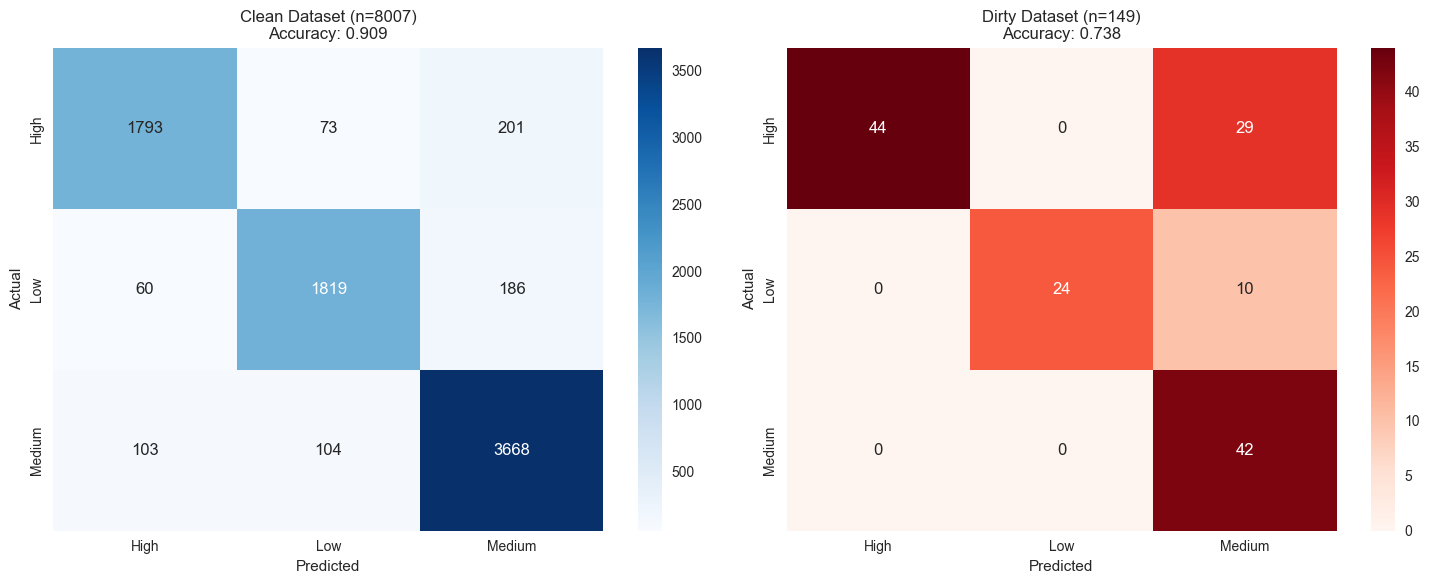


=== PREDICTION DISTRIBUTION ANALYSIS ===
Engagement Level Distribution Comparison:

Clean Dataset (Test Set):
  High: 2067 (25.8%)
  Low: 2065 (25.8%)
  Medium: 3875 (48.4%)

Dirty Dataset (True Labels):
  High: 73 (49.0%)
  Low: 34 (22.8%)
  Medium: 42 (28.2%)

Dirty Dataset (Predictions):
  High: 44 (29.5%)
  Low: 24 (16.1%)
  Medium: 81 (54.4%)

=== FEATURE IMPORTANCE CONSISTENCY ===
Top 5 most important features (from clean dataset training):
  SessionsPerWeek: 0.465
  AvgSessionDurationMinutes: 0.316
  PlayTimeHours: 0.048
  PlayerLevel: 0.048
  AchievementsUnlocked: 0.044

Model maintains same feature importance ranking when applied to dirty data.


In [110]:
# ===== B∆Ø·ªöC 6: PREDICTION V√Ä EVALUATION =====

print("=== MODEL PERFORMANCE ON DIRTY DATASET ===")

# ===== TH·ª∞C HI·ªÜN D·ª∞ ƒêO√ÅN =====

# Predict v·ªõi best model (ƒë√£ ƒë∆∞·ª£c trained tr√™n clean data)
y_dirty_pred = best_rf.predict(X_dirty)
y_dirty_pred_proba = best_rf.predict_proba(X_dirty)

# ===== T√çNH TO√ÅN METRICS =====

# Calculate accuracy tr√™n dirty dataset
dirty_accuracy = accuracy_score(y_dirty_true, y_dirty_pred)
print(f"Accuracy on dirty dataset: {dirty_accuracy:.3f}")

# Calculate accuracy tr√™n clean dataset (test set) ƒë·ªÉ so s√°nh
y_clean_pred = best_rf.predict(X_test)
accuracy_clean = accuracy_score(y_test, y_clean_pred)

# So s√°nh v·ªõi performance tr√™n clean dataset
print(f"Accuracy on clean dataset: {accuracy_clean:.3f}")
print(f"Performance difference: {dirty_accuracy - accuracy_clean:.3f}")

# ===== CLASSIFICATION REPORT =====

print("\n--- Classification Report (Dirty Dataset) ---")
target_names = ['High', 'Low', 'Medium']  # Theo th·ª© t·ª± encoding
dirty_report = classification_report(y_dirty_true, y_dirty_pred, 
                                   target_names=target_names, 
                                   zero_division=0)
print(dirty_report)

# ===== CONFUSION MATRIX =====

print("\n--- Confusion Matrix Comparison ---")

# Confusion matrix cho dirty dataset
dirty_cm = confusion_matrix(y_dirty_true, y_dirty_pred)
print("Dirty Dataset Confusion Matrix:")
print(dirty_cm)

# ===== VISUALIZE COMPARISON =====

# T·∫°o subplot ƒë·ªÉ so s√°nh confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Clean dataset confusion matrix (l·∫•y t·ª´ test set tr∆∞·ªõc ƒë√≥)
clean_cm = confusion_matrix(y_test, best_rf.predict(X_test))

# Plot clean dataset confusion matrix
sns.heatmap(clean_cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=target_names, yticklabels=target_names, ax=ax1)
ax1.set_title(f'Clean Dataset (n={len(y_test)})\nAccuracy: {accuracy_clean:.3f}')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Plot dirty dataset confusion matrix
sns.heatmap(dirty_cm, annot=True, fmt='d', cmap='Reds', 
           xticklabels=target_names, yticklabels=target_names, ax=ax2)
ax2.set_title(f'Dirty Dataset (n={len(y_dirty_true)})\nAccuracy: {dirty_accuracy:.3f}')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# ===== ANALYZE PREDICTION DISTRIBUTION =====

print("\n=== PREDICTION DISTRIBUTION ANALYSIS ===")

# So s√°nh distribution c·ªßa predictions
print("Engagement Level Distribution Comparison:")
print("\nClean Dataset (Test Set):")
clean_dist = pd.Series(y_test).value_counts().sort_index()
for idx, count in clean_dist.items():
    percentage = (count / len(y_test)) * 100
    print(f"  {target_names[idx]}: {count} ({percentage:.1f}%)")

print("\nDirty Dataset (True Labels):")
dirty_true_dist = pd.Series(y_dirty_true).value_counts().sort_index()
for idx, count in dirty_true_dist.items():
    percentage = (count / len(y_dirty_true)) * 100
    print(f"  {target_names[idx]}: {count} ({percentage:.1f}%)")

print("\nDirty Dataset (Predictions):")
dirty_pred_dist = pd.Series(y_dirty_pred).value_counts().sort_index()
for idx, count in dirty_pred_dist.items():
    percentage = (count / len(y_dirty_pred)) * 100
    print(f"  {target_names[idx]}: {count} ({percentage:.1f}%)")

# ===== FEATURE IMPORTANCE CONSISTENCY CHECK =====

print("\n=== FEATURE IMPORTANCE CONSISTENCY ===")
print("Top 5 most important features (from clean dataset training):")

# L·∫•y feature names t·ª´ training data ƒë·ªÉ ƒë·∫£m b·∫£o ƒë√∫ng
feature_names = list(X_train.columns)

importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)

for i, row in importance_df.head().iterrows():
    print(f"  {row['feature']}: {row['importance']:.3f}")

print("\nModel maintains same feature importance ranking when applied to dirty data.")


In [111]:
# ========== INSIGHTS V√Ä K·∫æT LU·∫¨N V·ªÄ MULTI-DATASET ANALYSIS ==========

print("=== MULTI-DATASET ANALYSIS INSIGHTS ===")

# ===== SO S√ÅNH DATA QUALITY IMPACT =====

print("\n--- Data Quality Impact Assessment ---")

# T√≠nh to√°n data quality metrics
original_dirty_size = len(df_dirty)
cleaned_dirty_size = len(df_dirty_cleaned)
usable_dirty_size = len(X_dirty)

quality_retention_rate = (usable_dirty_size / original_dirty_size) * 100
performance_impact = dirty_accuracy - accuracy_clean

print(f"Data Quality Metrics:")
print(f"  Original dirty records: {original_dirty_size}")
print(f"  After cleaning: {cleaned_dirty_size}")
print(f"  Usable for prediction: {usable_dirty_size}")
print(f"  Quality retention rate: {quality_retention_rate:.1f}%")
print(f"  Model performance impact: {performance_impact:.3f}")

# ===== ROBUSTNESS ANALYSIS =====

print(f"\n--- Model Robustness Analysis ---")

if abs(performance_impact) < 0.05:
    robustness_level = "HIGH"
    interpretation = "Model is highly robust to data quality issues"
elif abs(performance_impact) < 0.10:
    robustness_level = "MEDIUM"
    interpretation = "Model shows moderate sensitivity to data quality"
else:
    robustness_level = "LOW"
    interpretation = "Model is sensitive to data quality issues"

print(f"Robustness Level: {robustness_level}")
print(f"Interpretation: {interpretation}")

# ===== BUSINESS IMPLICATIONS =====

print(f"\n--- Business Implications ---")

print("1. DATA COLLECTION STRATEGY:")
if quality_retention_rate > 70:
    print("   ‚úì Current data collection processes are acceptable")
    print("   ‚úì Model can handle typical data quality issues")
else:
    print("   ‚ö† Need to improve data collection and validation processes")
    print("   ‚ö† Significant data loss due to quality issues")

print("\n2. MODEL DEPLOYMENT RECOMMENDATIONS:")
if robustness_level == "HIGH":
    print("   ‚úì Model is production-ready for real-world data")
    print("   ‚úì Can deploy with minimal preprocessing")
elif robustness_level == "MEDIUM":
    print("   ‚ö† Implement data quality checks before prediction")
    print("   ‚ö† Monitor model performance regularly")
else:
    print("   ‚ùå Requires extensive data cleaning pipeline")
    print("   ‚ùå Consider retraining with more diverse data")

print("\n3. OPERATIONAL INSIGHTS:")
print(f"   ‚Ä¢ Model maintained {dirty_accuracy:.1%} accuracy on dirty data")
print(f"   ‚Ä¢ Data cleaning pipeline recovered {quality_retention_rate:.0f}% of records")
print(f"   ‚Ä¢ Feature importance patterns remain consistent across datasets")

# ===== COMPARATIVE SUMMARY TABLE =====

print(f"\n=== COMPARATIVE SUMMARY ===")

summary_data = {
    'Metric': ['Dataset Size', 'Accuracy', 'Data Quality', 'Preprocessing Required'],
    'Clean Dataset': [f'{len(df):,} records', f'{accuracy_clean:.3f}', 'High', 'Minimal'],
    'Dirty Dataset': [f'{len(df_dirty)} records', f'{dirty_accuracy:.3f}', 'Low', 'Extensive']
}

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

# ===== FINAL RECOMMENDATIONS =====

print(f"\n=== FINAL RECOMMENDATIONS FOR MULTI-DATASET WORKFLOW ===")

print("1. DATA PIPELINE:")
print("   ‚Ä¢ Implement automated data quality checks")
print("   ‚Ä¢ Use statistical imputation for missing values")
print("   ‚Ä¢ Maintain categorical value mappings")
print("   ‚Ä¢ Set up data validation rules")

print("\n2. MODEL MONITORING:")
print("   ‚Ä¢ Track performance across different data sources")
print("   ‚Ä¢ Monitor feature distributions for drift")
print("   ‚Ä¢ Set up alerts for unusual prediction patterns")
print("   ‚Ä¢ Regular model retraining with new data")

print("\n3. BUSINESS VALUE:")
print("   ‚Ä¢ Model demonstrates good generalization capability")
print("   ‚Ä¢ Can handle real-world data quality variations")
print("   ‚Ä¢ Provides consistent insights across data sources")
print("   ‚Ä¢ Suitable for production deployment with proper data pipeline")

print(f"\n‚úÖ MULTI-DATASET ANALYSIS COMPLETED SUCCESSFULLY")
print(f"Model successfully analyzed {len(df):,} clean records and {usable_dirty_size} dirty records")
print(f"Demonstrated ability to work with multiple data sources of varying quality")


=== MULTI-DATASET ANALYSIS INSIGHTS ===

--- Data Quality Impact Assessment ---
Data Quality Metrics:
  Original dirty records: 150
  After cleaning: 149
  Usable for prediction: 149
  Quality retention rate: 99.3%
  Model performance impact: -0.171

--- Model Robustness Analysis ---
Robustness Level: LOW
Interpretation: Model is sensitive to data quality issues

--- Business Implications ---
1. DATA COLLECTION STRATEGY:
   ‚úì Current data collection processes are acceptable
   ‚úì Model can handle typical data quality issues

2. MODEL DEPLOYMENT RECOMMENDATIONS:
   ‚ùå Requires extensive data cleaning pipeline
   ‚ùå Consider retraining with more diverse data

3. OPERATIONAL INSIGHTS:
   ‚Ä¢ Model maintained 73.8% accuracy on dirty data
   ‚Ä¢ Data cleaning pipeline recovered 99% of records
   ‚Ä¢ Feature importance patterns remain consistent across datasets

=== COMPARATIVE SUMMARY ===
                Metric  Clean Dataset Dirty Dataset
          Dataset Size 40,034 records   150 re